<a href="https://colab.research.google.com/github/SLMath/Credit_Score-Analysis/blob/eda_matheus/credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ID** - Represents a unique identification of an entry                 
**Customer_ID** - Represents a unique identification of a person      
**Month** - Represents the month of the year        
**Name** - Represents the name of a person     
**Age** - Represents the age of the person        
**SSN** - Represents the social security number of a person       
**Occupation** - Represents the occupation of the person     
**Annual_Income** - Represents the annual income of the person      
**Monthly_Inhand_Salary** - Represents the monthly base salary of a person      
**Num_Bank_Accounts** - Represents the number of bank accounts a person holds       
**Num_Credit_Card** - Represents the number of other credit cards held by a person        
**Interest_Rate** - Represents the interest rate on credit card     
**Num_of_Loan** - Represents the number of loans taken from the bank      
**Type_of_Loan** - Represents the types of loan taken by a person      
**Delay_from_due_date** - Represents the average number of days delayed from the payment date     
**Num_of_Delayed_Payment** - Represents the average number of payments delayed by a person       
**Changed_Credit_Limit** - Represents the percentage change in credit card limit       
**Num_Credit_Inquiries** - Represents the number of credit card inquiries      
**Credit_Mix** - Represents the classification of the mix of credits     
**Outstanding_Debt** - Represents the remaining debt to be paid (in USD)       
**Credit_Utilization_Ratio** - Represents the utilization ratio of credit card     
**Credit_History_Age** - Represents the age of credit history of the person      
**Payment_of_Min_Amount** - Represents whether only the minimum amount was paid by the person       
**Total_EMI_per_month** - Represents the monthly EMI payments (in USD)        
**Amount_invested_monthly** - Represents the monthly amount invested by the customer (in USD)     
**Payment_Behaviour** - Represents the payment behavior of the customer (in USD)        
**Monthly_Balance** - Represents the monthly balance amount of the customer (in USD)      

# Importar Dados

In [1061]:
import pandas as pd
import numpy as np

In [1062]:
train_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/train.csv')
print(train_df.shape)
train_df.head(100)

(100000, 28)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0x168d,CUS_0xc0ab,August,Soyoungd,33,342-90-2649,Engineer,88640.24,7266.686667,3,...,Good,950.36,30.870799,26 Years and 0 Months,No,135.173371,98.44195128223792,High_spent_Large_value_payments,733.0533444127112,Good
96,0x1692,CUS_0x3e45,January,Harriet McLeodd,35,414-53-2918,Entrepreneur,54392.16,4766.680000,6,...,Standard,179.22,25.649246,26 Years and 10 Months,Yes,124.392082,243.73543739209438,Low_spent_Large_value_payments,378.54048018698535,Standard
97,0x1693,CUS_0x3e45,February,Harriet McLeodd,35_,414-53-2918,Entrepreneur,54392.16,4766.680000,6,...,Standard,179.22,29.408775,26 Years and 11 Months,Yes,124.392082,142.75186411942676,High_spent_Medium_value_payments,459.52405345965286,Standard
98,0x1694,CUS_0x3e45,March,Harriet McLeodd,35,#F%$D@*&8,Entrepreneur,54392.16_,NaN,6,...,_,179.22,31.258928,27 Years and 0 Months,NM,124.392082,33.349568589344514,High_spent_Large_value_payments,558.9263489897351,Standard


In [1063]:
test_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/test.csv')
print(test_df.shape)
test_df.head()

(50000, 27)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [1064]:
df = pd.concat([train_df,test_df])
df = df.sort_values(by=['Customer_ID', 'ID'])

# EDA

In [1065]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [1066]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## Verificando dados irrelevantes para a análise

In [1067]:
df['Customer_ID'].isna().sum()

0

In [1068]:
len(df['Customer_ID'].unique())

12500

In [1069]:
df['Customer_ID'].apply(lambda cust_prefix: not re.match('^CUS_0x[0-9a-fA-F]+$', cust_prefix)).sum()

0

O "ID" é único para cada registro, portando dispensável.

Como o "Customer_ID", "Name" e "SSN" são redundantes, manteremos apenas "Customer_ID" (verificado que não há nulos).

Vimos que existem 12500 Customers IDs diferentes, todos com prefixo 'CUS_0x' seguido de um hexadecimal

In [1070]:
df = df.drop(columns= ['ID', 'Name', 'SSN'])

In [1071]:
# Extraindo e transformando o hexadecimal em int, para melhorar o processamento e armazenamento dos dados
df['Customer_ID'] = df['Customer_ID'].str[4:].apply(int, base=16)
len(df['Customer_ID'].unique())

12500

Não houve perdas de customer ID

## Verificando tipos de dados inconsistentes

In [1072]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 56752 to 49579
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  int64  
 1   Month                     150000 non-null  object 
 2   Age                       150000 non-null  object 
 3   Occupation                150000 non-null  object 
 4   Annual_Income             150000 non-null  object 
 5   Monthly_Inhand_Salary     127500 non-null  float64
 6   Num_Bank_Accounts         150000 non-null  int64  
 7   Num_Credit_Card           150000 non-null  int64  
 8   Interest_Rate             150000 non-null  int64  
 9   Num_of_Loan               150000 non-null  object 
 10  Type_of_Loan              132888 non-null  object 
 11  Delay_from_due_date       150000 non-null  int64  
 12  Num_of_Delayed_Payment    139500 non-null  object 
 13  Changed_Credit_Limit      150000 non-null

Os seguintes atributos estão com tipos diferentes do esperado:
- numéricos, tratados como objetos
    - Age
    - Annual_Income
    - Num_of_Loan
    - Num_of_Delayed_Payment
    - Changed_Credit_Limit
    - Outstanding_Debt
    - Credit_History_Age
    - Amount_invested_monthly
    - Monthly_Balance
- inteiro, tratados como float
    - Num_Credit_Inquiries

### Age

In [1073]:
# Verify not numerical values
df['Age'][pd.to_numeric(df['Age'], errors='coerce', ).isna()].unique()

array(['17_', '26_', '19_', '43_', '44_', '16_', '30_', '40_', '15_',
       '50_', '51_', '41_', '45_', '46_', '54_', '39_', '14_', '38_',
       '56_', '48_', '24_', '25_', '3843_', '29_', '31_', '35_', '23_',
       '22_', '32_', '42_', '20_', '49_', '28_', '34_', '36_', '37_',
       '18_', '1018_', '27_', '33_', '53_', '1248_', '52_', '2812_',
       '21_', '5109_', '47_', '55_', '1210_', '8669_', '8348_', '4698_',
       '6647_', '914_', '299_', '909_', '2329_', '5798_', '217_', '6770_',
       '1070_', '128_', '2171_', '5373_', '3742_', '3834_', '8207_',
       '2155_', '7316_', '3055_', '8327_', '4610_', '2336_', '4583_',
       '619_', '7406_', '2373_', '6400_', '6453_', '4943_', '8153_',
       '5697_', '2846_', '3564_', '2926_', '6471_', '7723_', '4445_',
       '707_', '6031_', '5026_', '5589_', '1447_', '1882_', '3578_',
       '4913_', '2474_', '6408_', '7868_', '1102_', '2389_', '3984_',
       '6564_', '1776_', '8631_', '2463_', '2077_', '8340_', '2097_',
       '7715_'

In [1074]:
#data types
df.dtypes

Customer_ID                   int64
Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [1075]:
#info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 56752 to 49579
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  int64  
 1   Month                     150000 non-null  object 
 2   Age                       150000 non-null  object 
 3   Occupation                150000 non-null  object 
 4   Annual_Income             150000 non-null  object 
 5   Monthly_Inhand_Salary     127500 non-null  float64
 6   Num_Bank_Accounts         150000 non-null  int64  
 7   Num_Credit_Card           150000 non-null  int64  
 8   Interest_Rate             150000 non-null  int64  
 9   Num_of_Loan               150000 non-null  object 
 10  Type_of_Loan              132888 non-null  object 
 11  Delay_from_due_date       150000 non-null  int64  
 12  Num_of_Delayed_Payment    139500 non-null  object 
 13  Changed_Credit_Limit      150000 non-null

### Text Cleaning Function

In [1076]:
def clean_text(data):
    if data is np.nan or not isinstance(data, str):
        return data
    else:
        return str(data).strip('"_, -')

In [1077]:
#applymap cleantext replacing 
df = df.applymap(clean_text).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
56752,4096,January,17,Lawyer,30625.94,2706.161667,6,5,27,2,...,Bad,1562.91,26.612093,10 Years and 2 Months,Yes,42.941090,244.75028300769162,Low_spent_Large_value_payments,252.9247932365056,Standard
56753,4096,February,17,Lawyer,30625.94,NaN,6,5,27,2,...,Bad,1562.91,29.439759,10 Years and 3 Months,Yes,42.941090,176.13256665597928,High_spent_Small_value_payments,311.542509588218,Poor
56754,4096,March,17,Lawyer,30625.94,2706.161667,6,5,27,2,...,Bad,1562.91,38.285928,10 Years and 4 Months,Yes,42.941090,109.05651876486915,High_spent_Medium_value_payments,368.61855747932816,Poor
56755,4096,April,17,Lawyer,30625.94,2706.161667,6,5,27,2,...,Bad,1562.91,32.843081,10 Years and 5 Months,Yes,42.941090,87.90990881495769,NaN,419.7651674292397,Poor
56756,4096,May,17,Lawyer,30625.94,2706.161667,6,5,27,2,...,Bad,1562.91,32.330508,10 Years and 6 Months,Yes,42.941090,191.8347674990596,Low_spent_Large_value_payments,305.8403087451377,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99159,4093,August,30,Scientist,41398.44,3749.870000,8,7,13,6,...,Standard,1701.88,39.916655,18 Years and 9 Months,Yes,182.976649,42.57571978536272,High_spent_Large_value_payments,389.434631,Good
49576,4093,September,30,Scientist,41398.44,3749.870000,8,7,13,6,...,Standard,1701.88,33.972277,18 Years and 10 Months,Yes,182.976649,63.74729335399748,High_spent_Large_value_payments,368.2630571930874,NaN
49577,4093,October,30,Scientist,41398.44,3749.870000,8,7,13,6,...,Standard,1701.88,29.774213,18 Years and 11 Months,Yes,182.976649,230.37498406316536,Low_spent_Large_value_payments,231.63536648391946,NaN
49578,4093,November,30,Scientist,41398.44,3749.870000,8,7,13,6,...,Standard,1701.88,32.031308,19 Years and 0 Months,Yes,182.976649,434.95529560906965,Low_spent_Small_value_payments,47.05505493801514,NaN


In [1078]:
#Transform everything to float
remove_underline_cols = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Credit_History_Age',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Age'
]
for col in remove_underline_cols:
    df[col] = df[col].str.replace('_','')
    try:
        df[col] = df[col].apply(float)
    except:
        pass

df[remove_underline_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 56752 to 49579
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Annual_Income            150000 non-null  float64
 1   Num_of_Loan              150000 non-null  float64
 2   Num_of_Delayed_Payment   139500 non-null  float64
 3   Changed_Credit_Limit     146850 non-null  float64
 4   Outstanding_Debt         150000 non-null  float64
 5   Credit_History_Age       136500 non-null  object 
 6   Amount_invested_monthly  143250 non-null  float64
 7   Monthly_Balance          146570 non-null  float64
 8   Age                      150000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 11.4+ MB


2 colunas ainda precisam de tratamento:
1. Changed_Credit_Limit
2. Credit_History_Age

In [1079]:
#count nan changed credit limit
df['Changed_Credit_Limit'].isna().sum()

3150

In [1080]:
#value_counts de changed credit limits negativos
df['Changed_Credit_Limit'][df['Changed_Credit_Limit'] < 0].value_counts()

Series([], Name: Changed_Credit_Limit, dtype: int64)

### Credit_History_Age

In [1081]:
# Verify not numerical values
df['Credit_History_Age'][ pd.to_numeric(df['Credit_History_Age'], errors='coerce', ).isna()]

56752     10 Years and 2 Months
56753     10 Years and 3 Months
56754     10 Years and 4 Months
56755     10 Years and 5 Months
56756     10 Years and 6 Months
                  ...          
99159     18 Years and 9 Months
49576    18 Years and 10 Months
49577    18 Years and 11 Months
49578     19 Years and 0 Months
49579     19 Years and 1 Months
Name: Credit_History_Age, Length: 150000, dtype: object

In [1082]:
# Verificar o formato:
formato_age = '\d+ Years and \d+ Months'
np.any(
    df['Credit_History_Age']\
    .dropna()\
    .apply(lambda value: not re.match(formato_age, value))
)

False

In [1083]:
#transformar X " Years and " Y " Months" em meses
def transform_years_months_to_months(value):
    if value is np.nan:
        return value
    else:
        years, months = re.findall('\d+', value)
        return int(years) * 12 + int(months)

df['Credit_History_Age'] = df['Credit_History_Age'].apply(transform_years_months_to_months).astype(float)
df['Credit_History_Age']

56752    122.0
56753    123.0
56754    124.0
56755    125.0
56756    126.0
         ...  
99159    225.0
49576    226.0
49577    227.0
49578    228.0
49579    229.0
Name: Credit_History_Age, Length: 150000, dtype: float64

In [1084]:
# Funcao do Matheus, parou de funcionar depois de alterações que fiz no dataset, nao consegui entender a razão, então a refiz
# Transformar texto em numero de meses
#def extract_number_months(years_months_str):
#    if value is np.nan:
#        return value
#    else:
#        y, m = np.array(years_months_str.split('-')).astype(int)
#        return y * 12 + m

# Transform: '{y} Years and {m} Months' into '{y}-{m}', and then apply extract_number_months
#df['Credit_History_Age'] = df['Credit_History_Age']\
#    .dropna()\
#    .str.replace(' Years and ', '-')\
#    .str.replace(' Months', '')\
#    .apply(extract_number_months)

#df['Credit_History_Age']

### Month: text to number

In [1085]:
# assumindo que todos os dados são do mesmo ano, transformaremos a coluna de meses
# para numerica para permitir ordenação.
# OBS: não usaremos datatime pois ele requer uma data, e não temos ano
mapa_meses = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}

df['Month'] = df['Month'].map(mapa_meses)
df['Month'].value_counts()

1     12500
2     12500
3     12500
4     12500
5     12500
6     12500
7     12500
8     12500
9     12500
10    12500
11    12500
12    12500
Name: Month, dtype: int64

## Tratar Dados Nulos ou negativos quando não deveria

Verificar contagem de dados nulos (faltantes/NaN)

In [1086]:
na_data = df.isna().sum()
na_data[na_data > 0]

#porcentagem de dados nulos
print(na_data[na_data > 0] / len(df))

#porcentagem de registros com algum dado nulo exceto Credit_score
print(df.drop(columns=['Credit_Score']).isna().any(axis=1).sum() / len(df))

Occupation                 0.070000
Monthly_Inhand_Salary      0.150000
Type_of_Loan               0.114080
Num_of_Delayed_Payment     0.070000
Changed_Credit_Limit       0.021000
Num_Credit_Inquiries       0.020000
Credit_Mix                 0.200000
Credit_History_Age         0.090000
Amount_invested_monthly    0.045000
Payment_Behaviour          0.076000
Monthly_Balance            0.022867
Credit_Score               0.333333
dtype: float64
0.6075933333333333


In [1087]:
na_data[na_data > 0]

#porcentagem de dados nulos
print(na_data[na_data > 0] / len(df))

#porcentagem de registros com algum dado nulo exceto Credit_score
print(df.drop(columns=['Credit_Score']).isna().any(axis=1).sum() / len(df))

Occupation                 0.070000
Monthly_Inhand_Salary      0.150000
Type_of_Loan               0.114080
Num_of_Delayed_Payment     0.070000
Changed_Credit_Limit       0.021000
Num_Credit_Inquiries       0.020000
Credit_Mix                 0.200000
Credit_History_Age         0.090000
Amount_invested_monthly    0.045000
Payment_Behaviour          0.076000
Monthly_Balance            0.022867
Credit_Score               0.333333
dtype: float64
0.6075933333333333


Como a porcentagem de registros é muita alta, vamos tentar preencher dados nulos.

Seguiremos a ordem das colunas pela contagem de nulos.


### Funções para limpar dataset

In [1088]:
def qtd_value_counts(df, col, x):
    return df[col].value_counts() < x

#replace values in columns for nan if value_counts <= x
def replace_value_counts(df, col, x, y=0):
    #contador de nans na coluna col
    nan_count_before = df[col].isna().sum()
    if y==0:
        for value, count in qtd_value_counts(df, col, x).items():
            if count:
                    df[col] = df[col].replace(value, np.nan)
    else:
        #only replace if the value is bigger than y
        for value, count in qtd_value_counts(df, col, x).items():
            if count and value > y:
                    df[col] = df[col].replace(value, np.nan)
    nan_count_after = df[col].isna().sum()
    print(f'Foram modificados {nan_count_after - nan_count_before} dados na coluna {col}')

#funcao replace valores menores que x para nan(Usualmente valores negativos)
def replace_less(df, col, x):
    nan_count_before = df[col].isna().sum()
    df[col] = df[col].apply(lambda value: np.nan if value < x else value)
    nan_count_after = df[col].isna().sum()
    print(f'Foram modificados {nan_count_after - nan_count_before} dados na coluna {col}')

#funcao replace valores maiores que x para nan
def replace_greater(df, col, x):
    nan_count_before = df[col].isna().sum()
    df[col] = df[col].apply(lambda value: np.nan if value > x else value)
    nan_count_after = df[col].isna().sum()
    print(f'Foram modificados {nan_count_after - nan_count_before} dados na coluna {col}')

#### Monthly_Inhand_Salary

In [1089]:
#contar quantos valores diferentes para montlhy inhand salary temos
df['Monthly_Inhand_Salary'].value_counts()

6082.187500    22
2295.058333    22
6358.956667    21
3080.555000    21
5766.491667    20
               ..
1466.790000     1
4946.335000     1
2883.568973     1
3332.248333     1
1235.975000     1
Name: Monthly_Inhand_Salary, Length: 13683, dtype: int64

In [1090]:
#transformar em nan todos os salarios com value_count < 3
replace_value_counts(df, 'Monthly_Inhand_Salary', 3)

Foram modificados 780 dados na coluna Monthly_Inhand_Salary


In [1091]:
#valuecounts de salarios
df['Monthly_Inhand_Salary'].value_counts()

2295.058333    22
6082.187500    22
3080.555000    21
6358.956667    21
5766.491667    20
               ..
1125.733926     3
3657.263333     3
4112.476890     3
4216.631741     3
872.510417      3
Name: Monthly_Inhand_Salary, Length: 13161, dtype: int64

### Funcoes para preencher dados usando backfill, forward fill e mean fill

Antes, eu usava a seguinte função para executar os fillback e forward, extremamente nao performatica, ate descobrir algo que performava melhor:

In [1092]:
#df[column_name] = df.groupby(Id)[column_name].transform(lambda x: x.fillna(method='bfill'))

In [1093]:
# Since all 12500 have at least a single not null value, we can use this value to estimate the missing data


def fill_back(df, Id, column_name):
    df[column_name] = df[column_name].fillna(
    df.groupby(Id)[column_name].transform('bfill')
)

def fill_forward(df, Id, column_name):
    df[column_name] = df[column_name].fillna(
    df.groupby(Id)[column_name].transform('ffill')
)

def fill_mean(df, Id, column_name):
    df[column_name] = df[column_name].fillna(
    df.groupby(Id)[column_name].transform('mean')
)

def fill_mode(df, Id, column_name):
    df[column_name] = df[column_name].fillna(
    df.groupby(Id)[column_name].transform(
        lambda limits: limits.value_counts().index[0]
    )
)



def fill_nan_back_forward_mean(df, Id, column_name):
    valores_nan0 = df[column_name].isna().sum()
    print("Foram encontrados", valores_nan0, "valores nulos na coluna", column_name)
# First, we try to fill the NaN values from any column with the backward fill of the same customer, if available
    if(valores_nan0>0):
        try:
            fill_back(df, Id, column_name)
        except:
            pass

    valores_nan1 = df[column_name].isna().sum()
    print("Foram transformados", valores_nan0 - valores_nan1, "valores com foward fill")

#Secondly, we try to fill the NaN values from any column with the forward fill of the same customer, if available
    if(valores_nan1>0):
        try:
            fill_forward(df, Id, column_name)
        except:
            pass

    valores_nan2 = df[column_name].isna().sum()
    print("Foram transformados", valores_nan1 - valores_nan2, "valores com backward fill")

# Thirdly, we try to fill the NaN values from Monthly_Inhand_Salary with the mean of the same customer, if available
    if(valores_nan2>0):
        try:
            fill_mean(df, Id, column_name)
        except:
            pass

    valores_nan3 = df[column_name].isna().sum()
    print("Foram transformados", valores_nan2 - valores_nan3, "valores com mean")
    print("Ainda existem", valores_nan3, "valores nulos na coluna", column_name)

In [1094]:
#limpar salarios negativos
replace_less(df, 'Monthly_Inhand_Salary', 0)

Foram modificados 0 dados na coluna Monthly_Inhand_Salary


In [1095]:
#chamar fancao para Montlhy_inhand_salary
fill_nan_back_forward_mean(df, 'Customer_ID', 'Monthly_Inhand_Salary')

Foram encontrados 23280 valores nulos na coluna Monthly_Inhand_Salary
Foram transformados 20626 valores com foward fill
Foram transformados 2654 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Monthly_Inhand_Salary


Num_Credit_Inquiries

In [1096]:
#descobrir quantos valores unicos de value unicos de todos os valores do dataset existem
df.drop(columns= ['Customer_ID', 'Month']).describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,150000.0,NaN,NaN,NaN,119.33794,682.554219,14.0,25.0,34.0,43.0,8698.0
Occupation,139500,15,Lawyer,9899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,150000.0,NaN,NaN,NaN,173055.202531,1404214.602713,7005.93,19455.49,37578.61,72796.905,24198062.0
Monthly_Inhand_Salary,150000.0,NaN,NaN,NaN,4192.339298,3182.678911,303.645417,1625.485208,3089.665,5950.863333,15204.633333
Num_Bank_Accounts,150000.0,NaN,NaN,NaN,17.00694,117.069476,-1.0,3.0,6.0,7.0,1798.0
Num_Credit_Card,150000.0,NaN,NaN,NaN,22.623447,129.143006,0.0,4.0,5.0,7.0,1499.0
Interest_Rate,150000.0,NaN,NaN,NaN,71.234907,461.537193,1.0,8.0,13.0,20.0,5799.0
Num_of_Loan,150000.0,NaN,NaN,NaN,10.941093,63.04546,0.0,2.0,3.0,6.0,1496.0
Type_of_Loan,132888,6260,Not Specified,2112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,150000.0,NaN,NaN,NaN,21.0634,14.860154,-5.0,10.0,18.0,28.0,67.0


In [1097]:
#value counts num_credit_inquiries
replace_value_counts(df, 'Num_Credit_Inquiries', 5)

Foram modificados 2481 dados na coluna Num_Credit_Inquiries


In [1098]:
#transformar todos os num_credit_inquiries > 50 e <0 em nan
replace_greater(df, 'Num_Credit_Inquiries', 50)
replace_less(df, 'Num_Credit_Inquiries', 0)

Foram modificados 15 dados na coluna Num_Credit_Inquiries
Foram modificados 0 dados na coluna Num_Credit_Inquiries


In [1099]:
fill_nan_back_forward_mean(df, 'Customer_ID', 'Num_Credit_Inquiries')

Foram encontrados 5496 valores nulos na coluna Num_Credit_Inquiries
Foram transformados 4978 valores com foward fill
Foram transformados 518 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Num_Credit_Inquiries


AGE

In [1100]:
#if age = negative, or age <= 0, or age > 120, age = nan
replace_greater(df, 'Age', 120)
replace_less(df, 'Age', 0)

Foram modificados 4170 dados na coluna Age
Foram modificados 0 dados na coluna Age


In [1101]:
#chamar funcao para Age
replace_value_counts(df, 'Age', 2)
fill_nan_back_forward_mean(df, 'Customer_ID', 'Age')

Foram modificados 9 dados na coluna Age
Foram encontrados 4179 valores nulos na coluna Age
Foram transformados 3827 valores com foward fill
Foram transformados 352 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Age


In [1102]:
#verificar se ainda temos nulos
df['Age'].isna().sum()

0

### Num_of_Loan e Avaliação pessoas com 0 empréstimos

In [1103]:
#existem pessoas com 0 emprestimos?
df['Num_of_Loan'].value_counts()

3.0       22618
2.0       22547
4.0       22111
0.0       16376
1.0       15901
          ...  
1474.0        1
608.0         1
610.0         1
449.0         1
1248.0        1
Name: Num_of_Loan, Length: 599, dtype: int64

In [1104]:
#type of loan value counts
df['Type_of_Loan'].value_counts()

Not Specified                                                                              2112
Credit-Builder Loan                                                                        1920
Personal Loan                                                                              1908
Debt Consolidation Loan                                                                    1896
Student Loan                                                                               1860
                                                                                           ... 
Home Equity Loan, Payday Loan, Credit-Builder Loan, Not Specified, and Home Equity Loan      12
Personal Loan, Student Loan, Personal Loan, and Home Equity Loan                             12
Home Equity Loan, Payday Loan, Not Specified, and Home Equity Loan                           12
Home Equity Loan, Mortgage Loan, and Payday Loan                                             12
Auto Loan, Payday Loan, Payday Loan, Mor

In [1105]:
#numero de nans typeofloan
df['Type_of_Loan'].isna().sum()

17112

In [1106]:
#fazer count de nan de type of loan para pessoas com 0 emprestimos
df['Type_of_Loan'][df['Num_of_Loan'] == 0].isna().sum()

16376

In [1107]:
#if num of loan = 0, type of loan = N/A
df['Type_of_Loan'][df['Num_of_Loan'] == 0] = 'N/A'

In [1108]:
#count de nan de Num_of_Delayed_Payment de pessoas com 0 emprestimos
print(df['Num_of_Delayed_Payment'][df['Num_of_Loan'] == 0].isna().sum())

#set Num_of_Delayed_Payment = 0 if Num_of_Loan = 0
df['Num_of_Delayed_Payment'][df['Num_of_Loan'] == 0] = 0

#count de Num_of_Delayed_Payment de pessoas com 0 emprestimos
df['Num_of_Delayed_Payment'][df['Num_of_Loan'] == 0].value_counts()

1183


0.0    16376
Name: Num_of_Delayed_Payment, dtype: int64

In [1109]:
#count nan credit_inquiry
df['Num_Credit_Inquiries'].isna().sum()

0

In [1110]:
#count de nan de Num_Credit_Inquiries de pessoas com 0 emprestimos
df['Num_Credit_Inquiries'][df['Num_of_Loan'] == 0].isna().sum()

0

Criação de coluna Have Loan

In [1111]:
#criar coluna have loan, 1 se tem emprestimo, 0 se nao tem
df['Have_Loan'] = df['Num_of_Loan'].apply(lambda x: 1 if x > 0 else 0)

#### Using Customer_ID to fill "customer-constante" columuns


In [1112]:
# Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries can be set the same way
cust_cte_cols = ['Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']
for col in cust_cte_cols:
    print(col, len(df.dropna(subset= col)['Customer_ID'].unique() ))

Type_of_Loan 12500
Num_of_Delayed_Payment 12500
Num_Credit_Inquiries 12500


In [1113]:
#count de nun type of loan, num of delayed payment e num credit inquiries de pessoas em todas as pessoas
df[cust_cte_cols].isna().sum()

Type_of_Loan               736
Num_of_Delayed_Payment    9317
Num_Credit_Inquiries         0
dtype: int64

Preencher os dados de todos os 3 tipos


In [1114]:
#unique value counts Occupation including nan
df['Occupation'].value_counts(dropna= False)

NaN              10500
Lawyer            9899
Engineer          9562
Architect         9550
Mechanic          9459
Accountant        9404
Scientist         9403
Developer         9381
Media_Manager     9362
Teacher           9318
Entrepreneur      9277
Journalist        9122
Doctor            9114
Manager           8973
Musician          8858
Writer            8818
Name: Occupation, dtype: int64

In [1115]:
save = df['Occupation'].isna().groupby(df['Customer_ID']).sum() >= 5
#percorrer save e retornar customer_id que sejam true
save = save[save == True].index
save

Int64Index([ 4041,  4646, 11348, 12867, 22551, 26698, 30259, 33509, 34786,
            35043, 39939, 40551, 46569],
           dtype='int64', name='Customer_ID')

In [1116]:
#mostrar ocupacao de pessoas em save
df['Occupation'][df['Customer_ID'].isin(save)]

50576          NaN
50577      Manager
50578      Manager
50579          NaN
50580      Manager
           ...    
85399    Architect
42696          NaN
42697    Architect
42698          NaN
42699    Architect
Name: Occupation, Length: 156, dtype: object

Usamos estes dados para verificar se tratasse de pessoas que se tornaram desempregadas ou se são erros, chegamos a conclusao que sao erros e que devem ser corrigidos.

In [1117]:
fill_nan_back_forward_mean(df, 'Customer_ID', 'Occupation')

Foram encontrados 10500 valores nulos na coluna Occupation
Foram transformados 9597 valores com foward fill
Foram transformados 903 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Occupation


## Type_of_Loan

In [1118]:
#back forward mean type of loan
fill_nan_back_forward_mean(df, 'Customer_ID', 'Type_of_Loan')

Foram encontrados 736 valores nulos na coluna Type_of_Loan
Foram transformados 675 valores com foward fill
Foram transformados 61 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Type_of_Loan


In [1119]:
#num_of_delayed_payment menor que 0
replace_less(df, 'Num_of_Delayed_Payment', 0)

#num_of_delayed_payment maior que numero de emprestimos
replace_greater(df, 'Num_of_Delayed_Payment', x = df['Num_of_Loan'].max())

#back forward mean num_of_delayed_payment
fill_nan_back_forward_mean(df, 'Customer_ID', 'Num_of_Delayed_Payment')

Foram modificados 0 dados na coluna Num_of_Delayed_Payment
Foram modificados 680 dados na coluna Num_of_Delayed_Payment
Foram encontrados 9997 valores nulos na coluna Num_of_Delayed_Payment
Foram transformados 9147 valores com foward fill
Foram transformados 850 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Num_of_Delayed_Payment


## Changed Credit Limit

In [1120]:
#value counts changed credit limit
df['Changed_Credit_Limit'].value_counts()


11.50    197
11.32    189
8.22     189
7.35     181
10.06    178
        ... 
2.89       1
34.57      1
31.18      1
24.29      1
33.61      1
Name: Changed_Credit_Limit, Length: 3888, dtype: int64

In [1121]:
#analisar os valores para entender como melhor preenche-los
df.query('Changed_Credit_Limit.isnull()').groupby('Customer_ID')['Changed_Credit_Limit'].size().sort_values(ascending= False)

Customer_ID
49454    3
6142     3
31865    3
16173    3
24466    3
        ..
18764    1
18771    1
18782    1
18835    1
50999    1
Name: Changed_Credit_Limit, Length: 2834, dtype: int64

In [1122]:
# caso exemplo 1
df[df['Customer_ID'] == 28666].Changed_Credit_Limit

96000    19.95
96001    19.95
96002    19.95
96003      NaN
96004    19.95
96005      NaN
96006      NaN
96007    19.95
48000    19.95
48001    19.95
48002    19.95
48003    19.95
Name: Changed_Credit_Limit, dtype: float64

In [1123]:
# caso exemplo 2
df[df['Customer_ID'] == 46029].Changed_Credit_Limit

7760    2.41
7761    9.41
7762    2.41
7763     NaN
7764     NaN
7765    2.41
7766    2.41
7767     NaN
3880    2.41
3881    2.41
3882    6.41
3883    2.41
Name: Changed_Credit_Limit, dtype: float64

In [1124]:
# caso exemplo 3
df[df['Customer_ID'] == 18325].Changed_Credit_Limit

28832     NaN
28833    3.66
28834    3.66
28835    3.66
28836    3.66
28837    3.66
28838    3.66
28839    8.66
14416    3.66
14417    3.66
14418    3.66
14419    3.66
Name: Changed_Credit_Limit, dtype: float64

In [1125]:
# vamos substituir nulos pela moda
fill_mode(df, 'Customer_ID', 'Changed_Credit_Limit')
df['Changed_Credit_Limit'].isna().sum()

0

In [1126]:
# caso exemplo 1
df[df['Customer_ID'] == 28666].Changed_Credit_Limit

96000    19.95
96001    19.95
96002    19.95
96003    19.95
96004    19.95
96005    19.95
96006    19.95
96007    19.95
48000    19.95
48001    19.95
48002    19.95
48003    19.95
Name: Changed_Credit_Limit, dtype: float64

In [1127]:
# caso exemplo 2
df[df['Customer_ID'] == 46029].Changed_Credit_Limit

7760    2.41
7761    9.41
7762    2.41
7763    2.41
7764    2.41
7765    2.41
7766    2.41
7767    2.41
3880    2.41
3881    2.41
3882    6.41
3883    2.41
Name: Changed_Credit_Limit, dtype: float64

In [1128]:
# caso exemplo 3
df[df['Customer_ID'] == 18325].Changed_Credit_Limit

28832    3.66
28833    3.66
28834    3.66
28835    3.66
28836    3.66
28837    3.66
28838    3.66
28839    8.66
14416    3.66
14417    3.66
14418    3.66
14419    3.66
Name: Changed_Credit_Limit, dtype: float64

#### Credit_History_Age

In [1129]:
#analisar os valores para entender como melhor preenche-los
df.query('Credit_History_Age.isnull()').groupby('Customer_ID')['Credit_History_Age'].size().sort_values(ascending= False)

Customer_ID
14528    7
31661    6
1161     6
17886    6
47993    6
        ..
22324    1
22305    1
22303    1
22297    1
50996    1
Name: Credit_History_Age, Length: 8499, dtype: int64

In [1130]:
# caso exemplo 1
df[df['Customer_ID'] == 1161].Credit_History_Age

18088      NaN
18089      NaN
18090      NaN
18091    202.0
18092      NaN
18093    204.0
18094    205.0
18095      NaN
9044     207.0
9045     208.0
9046     209.0
9047       NaN
Name: Credit_History_Age, dtype: float64

In [1131]:
# Esse valor foi convertido para unidade meses, então deve incrementar um para cada mes que passa
def fill_sequential_months(cust_months):
    # encontrar o primeiro valor nao nulo e qual a posicao relativa nesse df
    idx, months_1st = cust_months.reset_index(drop= True).reset_index().dropna().iloc[0]
    idx = int(idx)
    # preencher os meses anteriores ao idx-ésimo
    for prev_month in range(idx):
        cust_months.iloc[prev_month] = (months_1st - idx) + prev_month
    # preencher os restantes
    for next_month in range(idx + 1, len(cust_months)):
        if np.isnan(cust_months.iloc[next_month]):
            cust_months.iloc[next_month] = cust_months.iloc[next_month - 1] + 1
    return cust_months

#reset index para poder usar o index como referencia
df = df.reset_index()


df['Credit_History_Age'] = df\
    .sort_values('Month')\
    .groupby('Customer_ID')\
    ['Credit_History_Age']\
    .transform(fill_sequential_months)\
    .sort_index()\
    .astype(int)


In [1132]:
# caso exemplo 1
df[df['Customer_ID'] == 1161].Credit_History_Age

44160    199
44161    200
44162    201
44163    202
44164    203
44165    204
44166    205
44167    206
44168    207
44169    208
44170    209
44171    210
Name: Credit_History_Age, dtype: int32

In [1133]:
# caso exemplo 2
df[df['Customer_ID'] == 41768].Credit_History_Age

118332    189
118333    190
118334    191
118335    192
118336    193
118337    194
118338    195
118339    196
118340    197
118341    198
118342    199
118343    200
Name: Credit_History_Age, dtype: int32

## Tratando valores multiplos na coluna Type_of_Loan

In [1134]:
df['Type_of_Loan'].unique()

array(['Credit-Builder Loan, and Home Equity Loan',
       'Not Specified, Home Equity Loan, Credit-Builder Loan, and Payday Loan',
       'N/A', ...,
       'Not Specified, Student Loan, Student Loan, Credit-Builder Loan, and Auto Loan',
       'Credit-Builder Loan, Payday Loan, Not Specified, Student Loan, Student Loan, Home Equity Loan, Home Equity Loan, and Home Equity Loan',
       'Auto Loan, Payday Loan, Payday Loan, Mortgage Loan, Payday Loan, and Home Equity Loan'],
      dtype=object)

In [1135]:
tipos_emprestimo = np.unique([
    texto
    for lista_texto in pd.Series(df['Type_of_Loan'].dropna().unique())\
        .str.replace(', and', ',')\
        .str.split(', ')
    for texto in lista_texto
])
tipos_emprestimo

array(['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'N/A', 'Not Specified',
       'Payday Loan', 'Personal Loan', 'Student Loan'], dtype='<U23')

In [1136]:
df[tipos_emprestimo] = df['Type_of_Loan'].dropna().apply(
    lambda valor:
        pd.Series([
            tipo in valor for tipo in tipos_emprestimo
        ], index= tipos_emprestimo)
).astype(int)
df = df.drop(columns= 'Type_of_Loan')

df[tipos_emprestimo]

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,N/A,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0,1,0,1,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
149995,1,0,0,1,1,0,0,1,0,0
149996,1,0,0,1,1,0,0,1,0,0
149997,1,0,0,1,1,0,0,1,0,0
149998,1,0,0,1,1,0,0,1,0,0


In [1137]:
df.head(10)

,index,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,N/A,Not Specified,Payday Loan,Personal Loan,Student Loan
0,56752,4096,1,17.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
1,56753,4096,2,17.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
2,56754,4096,3,17.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
3,56755,4096,4,17.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
4,56756,4096,5,17.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
5,56757,4096,6,18.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
6,56758,4096,7,18.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
7,56759,4096,8,18.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
8,28376,4096,9,18.0,Lawyer,17188404.00,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
9,28377,4096,10,18.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0


In [1138]:
#remove annual income < 0 and bigger than 1e7
replace_value_counts(df, 'Annual_Income', 2)
replace_less(df, 'Annual_Income', 0)
replace_greater(df, 'Annual_Income', 1e7)

Foram modificados 1500 dados na coluna Annual_Income
Foram modificados 0 dados na coluna Annual_Income
Foram modificados 0 dados na coluna Annual_Income


In [1139]:
#replace nans from annual income
fill_nan_back_forward_mean(df, 'Customer_ID', 'Annual_Income')

Foram encontrados 1500 valores nulos na coluna Annual_Income
Foram transformados 1354 valores com foward fill
Foram transformados 146 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Annual_Income


In [1140]:
#credit mix value counts
df['Credit_Mix'].value_counts()

Standard    54858
Good        36597
Bad         28545
Name: Credit_Mix, dtype: int64

In [1141]:
#replace nans from credit mix
fill_nan_back_forward_mean(df, 'Customer_ID', 'Credit_Mix')

Foram encontrados 30000 valores nulos na coluna Credit_Mix
Foram transformados 26948 valores com foward fill
Foram transformados 3052 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Credit_Mix


In [1142]:
#amount invested monthly value counts
df['Amount_invested_monthly'].value_counts()

10000.000000    6480
0.000000         275
244.750283         1
140.492669         1
58.079653          1
                ... 
59.531227          1
40.963103          1
79.669283          1
105.464945         1
210.584896         1
Name: Amount_invested_monthly, Length: 136497, dtype: int64

In [1143]:
#verifica se todas os Amount_invested_monthly deste customer_id sao iguais, exceto os nans
df.groupby('Customer_ID')['Amount_invested_monthly'].apply(lambda x: x.nunique(dropna= False) == 12).value_counts()

#todos os usuarios tem essa variavel diferente uma da outra, nao fazendo sentido usar back e forward.

True     10141
False     2359
Name: Amount_invested_monthly, dtype: int64

In [1144]:
#cria um novo dataset com os valores de Amount_invested_monthly
df_copy = df[['Customer_ID', 'Month', 'Amount_invested_monthly']].copy()

In [1145]:
#fazer o sum de todos os valores de um customer_ID, dividir por 12, e salvar em uma nova coluna
df_copy['Amount_invested_monthly_mean'] = df_copy.groupby('Customer_ID')['Amount_invested_monthly'].transform('mean')

In [1146]:
#criar uma coluna com o valor da diferenca entre o valor medio e o valor daquele mes
df_copy['Amount_invested_monthly_diff'] = df_copy['Amount_invested_monthly'] - df_copy['Amount_invested_monthly_mean']

In [1147]:
#verificar quantos valores acima de 100 existem na coluna Amount_invested_monthly_diff
df_copy['Amount_invested_monthly_diff'].value_counts()

 5401.164969    5
 6562.401759    4
 6366.490322    4
 6279.336649    4
 6276.912419    4
               ..
-2.620332       1
-58.208710      1
 5.319979       1
 77.643751      1
 19.731353      1
Name: Amount_invested_monthly_diff, Length: 141828, dtype: int64

In [1148]:
df_copy

,Customer_ID,Month,Amount_invested_monthly,Amount_invested_monthly_mean,Amount_invested_monthly_diff
0,4096,1,244.750283,160.592459,84.157825
1,4096,2,176.132567,160.592459,15.540108
2,4096,3,109.056519,160.592459,-51.535940
3,4096,4,87.909909,160.592459,-72.682550
4,4096,5,191.834767,160.592459,31.242309
...,...,...,...,...,...
149995,4093,8,42.575720,190.853544,-148.277824
149996,4093,9,63.747293,190.853544,-127.106251
149997,4093,10,230.374984,190.853544,39.521440
149998,4093,11,434.955296,190.853544,244.101752


In [1149]:
#Queremos descobrir se existe algum cliente com mais de 3 valores NaN em sua carteira
df_copy['Amount_invested_monthly'].isna().groupby(df_copy['Customer_ID']).sum().sort_values(ascending= False)

#Quantos clientes tem mais de 2 valores NaN em sua carteira?
df_copy['Amount_invested_monthly'].isna().groupby(df_copy['Customer_ID']).sum().sort_values(ascending= False).value_counts()

0    7193
1    4065
2    1060
3     166
4      13
5       3
Name: Amount_invested_monthly, dtype: int64

In [1150]:
#Salvar o customer_Id de todos os clientes que tem mais de 2 valores NaN em sua carteira
customer_id_nan = df_copy['Amount_invested_monthly'].isna().groupby(df_copy['Customer_ID']).sum().sort_values(ascending= False).reset_index().query('Amount_invested_monthly >= 2')['Customer_ID'].values

customer_id_nan.shape


(1242,)

In [1151]:
#Create new dataset only with customers from customer_id_nan, drop them from df_copy
df_copy_nan = df_copy[df_copy['Customer_ID'].isin(customer_id_nan)].copy()
df_copy = df_copy[~df_copy['Customer_ID'].isin(customer_id_nan)].copy()

print(df_copy.shape)
print(df_copy_nan.shape)

(135096, 5)
(14904, 5)


In [1152]:
#Queremos saber quanto todos os clientes Nan juntos investiram
df_copy_nan.groupby('Month')['Amount_invested_monthly'].sum()

Month
1     689832.878559
2     754675.899106
3     705153.061865
4     642918.031643
5     656597.339156
6     575354.355381
7     564702.041714
8     560971.369621
9     776991.526759
10    647306.894628
11    568997.324789
12    623123.228518
Name: Amount_invested_monthly, dtype: float64

In [1153]:
#Queremos descobrir quanto todos os clientes juntos investiram
df_copy.groupby('Month')['Amount_invested_monthly'].sum()

Month
1     6.987857e+06
2     6.601057e+06
3     7.072338e+06
4     6.974491e+06
5     7.008670e+06
6     7.040551e+06
7     7.001482e+06
8     7.049677e+06
9     6.819610e+06
10    6.955038e+06
11    7.528948e+06
12    6.705526e+06
Name: Amount_invested_monthly, dtype: float64

In [1154]:
#Queremos saber quanto cada cliente Nan investiu por mes, desconsiderando os numeros de NaN de cada mes
df_copy_nan.groupby('Month')['Amount_invested_monthly'].apply(lambda x: x.sum()/x.count())

Month
1     689.832879
2     713.979091
3     683.950593
4     634.041451
5     639.958420
6     585.304532
7     548.787213
8     558.180467
9     776.215311
10    632.753563
11    552.424587
12    610.905126
Name: Amount_invested_monthly, dtype: float64

In [1155]:
df_copy.groupby('Month')['Amount_invested_monthly'].sum()/len(df_copy['Customer_ID'].unique())

Month
1     620.701444
2     586.343661
3     628.205530
4     619.514206
5     622.550147
6     625.382034
7     621.911748
8     626.192621
9     605.756821
10    617.786322
11    668.764268
12    595.623191
Name: Amount_invested_monthly, dtype: float64

In [1156]:
#some estes valores em uma variavel
df_copy_nan.groupby('Month')['Amount_invested_monthly'].apply(lambda x: x.sum()/x.count()).sum()

7626.333234076448

In [1157]:
#some estes valores em uma variavel
df_copy.groupby('Month')['Amount_invested_monthly'].sum().sum()/len(df_copy['Customer_ID'].unique())

7438.731991629139

Honestamente, estava incerto sobre como abordar essa questão e decidi buscar informações em fontes externas. Após algumas modificações, cheguei a uma função aproximada conforme apresentada a seguir. No entanto, ainda estou interessado em saber se existe uma abordagem mais eficiente para resolver esse problema.

In [1158]:
import numpy as np

def Numeric_Nan_Min_Max(data, id, col):
    for index, row in data.iterrows():
        current_id = row[id]
        current_value = row[col]

        # Check if the current value is NaN
        if np.isnan(current_value):
            # group by id
            same_id_data = data[data[id] == current_id]
            # Get the minimum and maximum values of the same category for the current ID
            min_value = same_id_data[col].min()
            max_value = same_id_data[col].max()

            # Assign the minimum or maximum value based on the range for the current ID and category
            if np.isnan(min_value):
                # If all values in the same category are NaN, assign 0
                data.at[index, col] = 0
            else:
                # Assign the minimum or maximum value based on the range for the current ID and category
                data.at[index, col] = min_value if min_value < max_value else max_value

    return data

In [1159]:
Numeric_Nan_Min_Max(df, 'Customer_ID', 'Amount_invested_monthly')

,index,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,N/A,Not Specified,Payday Loan,Personal Loan,Student Loan
0,56752,4096,1,17.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
1,56753,4096,2,17.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
2,56754,4096,3,17.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
3,56755,4096,4,17.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
4,56756,4096,5,17.0,Lawyer,30625.94,2706.161667,6,5,27,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,99159,4093,8,30.0,Scientist,41398.44,3749.870000,8,7,13,...,1,0,0,1,1,0,0,1,0,0
149996,49576,4093,9,30.0,Scientist,41398.44,3749.870000,8,7,13,...,1,0,0,1,1,0,0,1,0,0
149997,49577,4093,10,30.0,Scientist,41398.44,3749.870000,8,7,13,...,1,0,0,1,1,0,0,1,0,0
149998,49578,4093,11,30.0,Scientist,41398.44,3749.870000,8,7,13,...,1,0,0,1,1,0,0,1,0,0


In [1160]:
#Payment_Behaviour  value counts
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
Name: Payment_Behaviour, dtype: int64

In [1161]:
#replace nans from payment behaviour
fill_nan_back_forward_mean(df, 'Customer_ID', 'Payment_Behaviour')

Foram encontrados 11400 valores nulos na coluna Payment_Behaviour
Foram transformados 10378 valores com foward fill
Foram transformados 1022 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Payment_Behaviour


In [1162]:
#montlhy balance value counts
df['Monthly_Balance'].value_counts()


3.333333e+26    15
2.529248e+02     1
3.398444e+02     1
3.888119e+02     1
2.626689e+02     1
                ..
1.387102e+02     1
2.854892e+02     1
2.365184e+02     1
3.819574e+02     1
2.414255e+02     1
Name: Monthly_Balance, Length: 146556, dtype: int64

<Axes: xlabel='Monthly_Balance'>

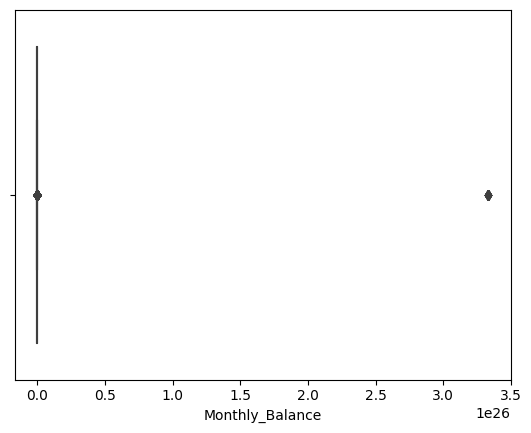

In [1163]:
#boxplot montlhy balance
sns.boxplot(x=df['Monthly_Balance'])

In [1164]:
#replace with nans value counts > 2e3
replace_greater(df, 'Monthly_Balance', 2e3)

Foram modificados 15 dados na coluna Monthly_Balance


In [1165]:
#fix nans
fill_nan_back_forward_mean(df, 'Customer_ID', 'Monthly_Balance')

Foram encontrados 3445 valores nulos na coluna Monthly_Balance
Foram transformados 3283 valores com foward fill
Foram transformados 162 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Monthly_Balance


In [1166]:
#is there any nans?
df.isna().sum()

index                           0
Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
Have_Loan                       0
Auto Loan                       0
Credit-Builder Loan             0
Debt Consolidation Loan         0
Home Equity Lo

<Axes: >

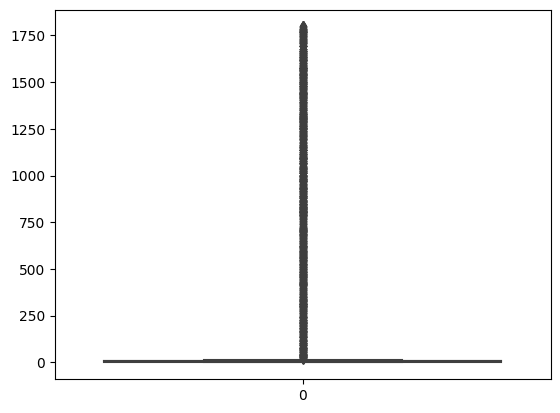

In [1167]:
#boxplot num bank account
sns.boxplot(df['Num_Bank_Accounts'])

In [1168]:
#replace all values > 20 with nan
replace_greater(df, 'Num_Bank_Accounts', 10)

Foram modificados 1978 dados na coluna Num_Bank_Accounts


In [1169]:
#replace nans with value
fill_nan_back_forward_mean(df, 'Customer_ID', 'Num_Bank_Accounts')

Foram encontrados 1978 valores nulos na coluna Num_Bank_Accounts
Foram transformados 1787 valores com foward fill
Foram transformados 191 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Num_Bank_Accounts


In [1170]:
df['Num_Credit_Card'].value_counts().sort_values(ascending=False).head(30)

5       27669
7       24886
6       24802
4       21102
3       19816
8        7453
10       7265
9        6976
2        3280
1        3195
11         77
0          29
849         9
924         8
51          8
852         8
284         8
1420        7
574         7
870         7
176         7
1180        7
1052        7
958         7
1217        7
1269        7
926         7
331         7
571         7
654         7
Name: Num_Credit_Card, dtype: int64

In [1171]:
#replace num credit card > 10 with nan
replace_greater(df, 'Num_Credit_Card', 10)

Foram modificados 3527 dados na coluna Num_Credit_Card


In [1172]:
fill_nan_back_forward_mean(df, 'Customer_ID', 'Num_Credit_Card')

Foram encontrados 3527 valores nulos na coluna Num_Credit_Card
Foram transformados 3155 valores com foward fill
Foram transformados 372 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Num_Credit_Card


In [1173]:
df['Interest_Rate'].value_counts()

8       7515
5       7479
6       7089
12      6828
10      6799
        ... 
4669       1
731        1
1144       1
5457       1
3808       1
Name: Interest_Rate, Length: 2394, dtype: int64

Decidimos não alterar dados de interest rate, por mais que o max e min sejam mt distintos, o numero de valores grandes é significativo, e não conseguimos entender o porque

<Axes: >

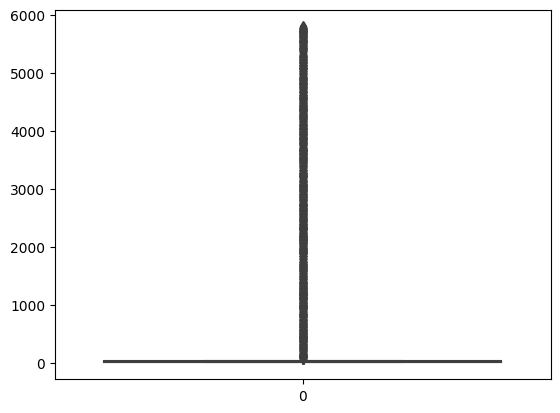

In [1174]:
#interest rate boxplot
sns.boxplot(df['Interest_Rate'])

In [1175]:
#Num_of_Loan value counts
df['Num_of_Loan'].value_counts().sort_values(ascending=False).head(30)

3.0       22618
2.0       22547
4.0       22111
0.0       16376
1.0       15901
6.0       11705
7.0       11024
5.0       10814
100.0      5851
9.0        5539
8.0        4785
1150.0        4
1365.0        3
463.0         3
288.0         3
1292.0        3
198.0         3
95.0          3
172.0         3
1225.0        3
773.0         3
58.0          3
50.0          3
1480.0        3
359.0         3
1259.0        3
430.0         3
1228.0        3
696.0         3
1463.0        2
Name: Num_of_Loan, dtype: int64

<Axes: >

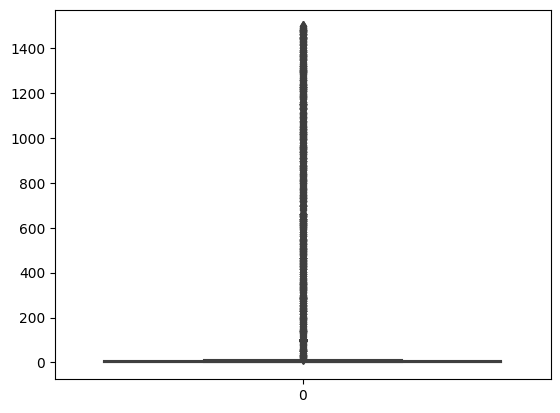

In [1176]:
#boxplot(df, 'Num_of_Loan')
sns.boxplot(df['Num_of_Loan'])


In [1177]:
#replace bigger than 10
replace_greater(df, 'Num_of_Loan', 10)

#replace_nans
fill_nan_back_forward_mean(df, 'Customer_ID', 'Num_of_Loan')


Foram modificados 6580 dados na coluna Num_of_Loan
Foram encontrados 6580 valores nulos na coluna Num_of_Loan
Foram transformados 6011 valores com foward fill
Foram transformados 569 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Num_of_Loan


In [1178]:
#Num_of_Delayed_Payment
df['Num_of_Delayed_Payment'].value_counts().sort_values(ascending=False).head(30)

#quantos valores acima de 100 existem
(df['Num_of_Delayed_Payment'] > 100).sum()

356

<Axes: >

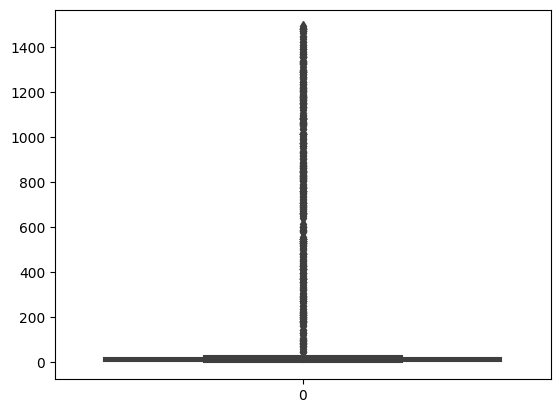

In [1179]:
#boxplot num of delayed payment
sns.boxplot(df['Num_of_Delayed_Payment'])

In [1180]:
#mostrar 10 customers com mais delayed payments e todos os seus meses
df[df['Num_of_Delayed_Payment'] > 100].sort_values(by='Num_of_Delayed_Payment', ascending=False).head(10)




,index,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,N/A,Not Specified,Payday Loan,Personal Loan,Student Loan
146853,1573,50875,10,21.0,Lawyer,60889.080,4859.090000,10.0,6.0,21,...,0,1,1,1,0,0,1,1,1,1
42407,3927,18058,12,47.0,Journalist,115827.920,9459.326667,7.0,6.0,17,...,0,0,1,0,0,0,0,1,0,0
45004,45348,18803,5,43.0,Teacher,12291.445,923.287083,5.0,5.0,6,...,0,1,0,1,0,0,0,1,0,0
13514,98210,8865,3,28.0,Lawyer,17024.050,1454.082708,3.0,4.0,12,...,1,0,1,0,0,0,1,1,0,1
13515,98211,8865,4,28.0,Lawyer,17024.050,1454.082708,3.0,4.0,12,...,1,0,1,0,0,0,1,1,0,1
13516,98212,8865,5,29.0,Lawyer,17024.050,1454.082708,3.0,4.0,12,...,1,0,1,0,0,0,1,1,0,1
36157,46081,16233,2,26.0,Journalist,18515.180,1651.931667,8.0,8.0,28,...,1,0,1,0,0,0,1,0,0,1
113059,94055,40169,8,25.0,Teacher,116034.930,9446.577500,1.0,5.0,9,...,0,1,0,0,0,0,0,0,0,0
68702,22322,26123,3,20.0,Accountant,118875.690,9939.307500,0.0,4.0,12,...,1,0,0,0,0,0,1,0,0,0
87876,17376,32209,1,47.0,Developer,179825.360,14866.446667,5.0,6.0,2,...,1,0,1,0,0,0,0,1,0,1


In [1181]:
#mostrar num of delayed payment de customer id customer id 50875, 18058, 18803, 8865, 16233, 40169, 26123, 32209, 42014
print(df[df['Customer_ID'] == 50875]['Num_of_Delayed_Payment'].value_counts())
print(df[df['Customer_ID'] == 18058]['Num_of_Delayed_Payment'].value_counts())
print(df[df['Customer_ID'] == 18803]['Num_of_Delayed_Payment'].value_counts())
print(df[df['Customer_ID'] == 8865]['Num_of_Delayed_Payment'].value_counts())
print(df[df['Customer_ID'] == 16233]['Num_of_Delayed_Payment'].value_counts())
print(df[df['Customer_ID'] == 40169]['Num_of_Delayed_Payment'].value_counts())
print(df[df['Customer_ID'] == 26123]['Num_of_Delayed_Payment'].value_counts())
print(df[df['Customer_ID'] == 32209]['Num_of_Delayed_Payment'].value_counts())
print(df[df['Customer_ID'] == 42014]['Num_of_Delayed_Payment'].value_counts())

23.0      7
20.0      2
25.0      2
1491.0    1
Name: Num_of_Delayed_Payment, dtype: int64
8.0       8
10.0      1
11.0      1
5.0       1
1486.0    1
Name: Num_of_Delayed_Payment, dtype: int64
15.0      8
13.0      2
1481.0    1
17.0      1
Name: Num_of_Delayed_Payment, dtype: int64
18.0      6
1480.0    3
17.0      1
21.0      1
20.0      1
Name: Num_of_Delayed_Payment, dtype: int64
16.0      9
1478.0    1
18.0      1
14.0      1
Name: Num_of_Delayed_Payment, dtype: int64
12.0      8
10.0      1
14.0      1
1473.0    1
13.0      1
Name: Num_of_Delayed_Payment, dtype: int64
3.0       7
5.0       3
1473.0    1
2.0       1
Name: Num_of_Delayed_Payment, dtype: int64
5.0       7
1471.0    1
4.0       1
6.0       1
8.0       1
7.0       1
Name: Num_of_Delayed_Payment, dtype: int64
15.0      7
16.0      3
12.0      1
1463.0    1
Name: Num_of_Delayed_Payment, dtype: int64


In [1182]:
#turn into nam bigger than 100
replace_greater(df, 'Num_of_Delayed_Payment', 100)

Foram modificados 356 dados na coluna Num_of_Delayed_Payment


In [1183]:
#replace nans
fill_nan_back_forward_mean(df, 'Customer_ID', 'Num_of_Delayed_Payment')

Foram encontrados 356 valores nulos na coluna Num_of_Delayed_Payment
Foram transformados 312 valores com foward fill
Foram transformados 44 valores com backward fill
Foram transformados 0 valores com mean
Ainda existem 0 valores nulos na coluna Num_of_Delayed_Payment


<Axes: >

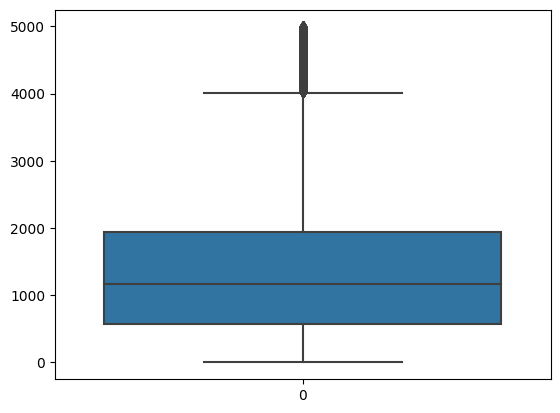

In [1184]:
#Outstanding_Debt boxplot
sns.boxplot(df['Outstanding_Debt'])

In [1185]:
#value counts outstanding debt
df['Outstanding_Debt'].value_counts()

#sort it by value
df['Outstanding_Debt'].sort_values(ascending=False).head(30)

146275    4998.07
146268    4998.07
146269    4998.07
146270    4998.07
146271    4998.07
146272    4998.07
146273    4998.07
146274    4998.07
146276    4998.07
146277    4998.07
146278    4998.07
146279    4998.07
83266     4997.10
83265     4997.10
83262     4997.10
83267     4997.10
83263     4997.10
83264     4997.10
83258     4997.10
83261     4997.10
83260     4997.10
83259     4997.10
83257     4997.10
83256     4997.10
14162     4997.05
14167     4997.05
14164     4997.05
14165     4997.05
14166     4997.05
14163     4997.05
Name: Outstanding_Debt, dtype: float64

<Axes: >

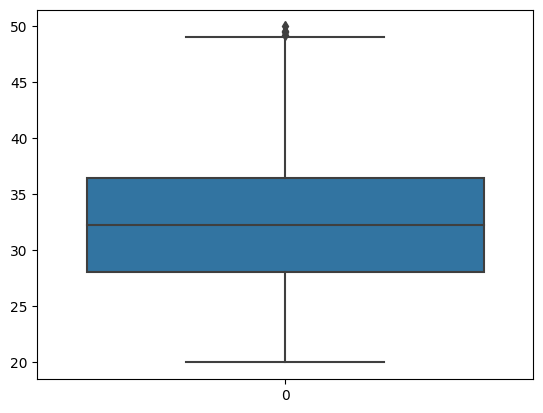

In [1186]:
#Credit_Utilization_Ratio boxplot
sns.boxplot(df['Credit_Utilization_Ratio'])

In [1187]:
#Credit_Utilization_Ratio show values > 45
df[df['Credit_Utilization_Ratio'] > 45]

,index,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,N/A,Not Specified,Payday Loan,Personal Loan,Student Loan
87,77971,4134,4,51.0,Manager,170614.28,14463.856667,2.0,6.0,9,...,1,0,0,0,0,0,0,1,0,0
544,20940,4293,5,24.0,Entrepreneur,158623.16,13180.596667,2.0,7.0,10,...,0,0,0,0,0,0,0,1,0,0
641,99517,4345,6,54.0,Lawyer,150131.68,12596.973333,5.0,1.0,4,...,0,0,0,0,0,1,0,0,0,0
643,99519,4345,8,54.0,Lawyer,150131.68,11102.135322,5.0,1.0,4,...,0,0,0,0,0,1,0,0,0,0
806,98674,4400,3,37.0,Journalist,137798.88,10609.791909,6.0,5.0,13,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145912,68548,50558,5,37.0,Writer,146999.24,12110.936667,5.0,6.0,10,...,0,0,0,0,0,1,0,0,0,0
147683,1115,3333,12,46.0,Musician,132537.24,10111.962575,3.0,2.0,12,...,0,0,0,0,1,0,0,0,0,0
148146,91422,3504,7,45.0,Engineer,131760.30,11139.025000,2.0,3.0,6,...,0,0,0,0,0,1,0,0,0,0
149099,22075,3787,12,21.0,Manager,141688.28,11574.356667,5.0,6.0,2,...,0,1,0,1,0,0,0,0,0,0


In [1188]:
#Payment_of_Min_Amount value counts
df['Payment_of_Min_Amount'].value_counts()

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

<Axes: >

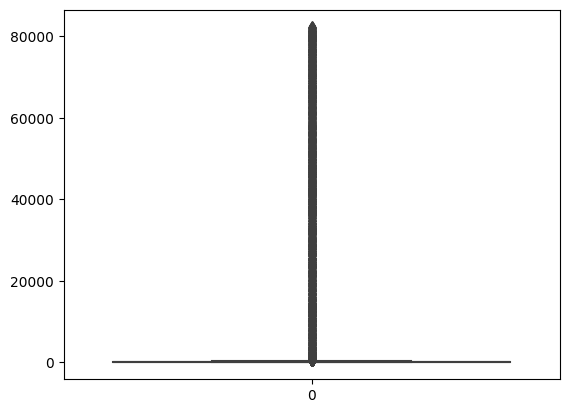

In [1189]:
#Total_EMI_per_month boxplot
sns.boxplot(df['Total_EMI_per_month'])

In [1190]:
#replace value counter <2 nan, but only if the removed value is bigger than 10000

replace_value_counts(df, 'Total_EMI_per_month', 2, 10000)

Foram modificados 4012 dados na coluna Total_EMI_per_month


In [1191]:
# vamos substituir nulos pela moda
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].fillna(
    df.groupby('Customer_ID')['Total_EMI_per_month'].transform(
        lambda limits: limits.value_counts().index[0]
    )
)
df['Changed_Credit_Limit'].isna().sum()

0

In [1192]:
df.isna().sum()

index                           0
Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
Have_Loan                       0
Auto Loan                       0
Credit-Builder Loan             0
Debt Consolidation Loan         0
Home Equity Lo

In [1193]:
#separate the data for test and train, all values with unknow Credit_Score should be in test.

test_cleared = df[df['Credit_Score'].isna()]
train_cleared = df[~df['Credit_Score'].isna()]

#make csv
test_cleared.to_csv('test_cleared.csv', index=False)
train_cleared.to_csv('train_cleared.csv', index=False)

Descobrimos que, devido ao desafio deste dataset ter finalizado, nao temos acesso ao target do test.csv, e nem temos como enviar novos arquivos para serem analisados. Dito isto, tivemos que descartar o test_cleared e criar um novo test_train

In [1194]:
#import sklearn
from sklearn.model_selection import train_test_split

#Check the credit score of df, with %
df['Credit_Score'].value_counts(normalize=True)


Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

In [1195]:
#create a list with all 12500 customerIds

customer_ids = df['Customer_ID'].unique().tolist()

In [1196]:
import random
customer_ids_75 = random.sample(customer_ids, int(len(customer_ids)*0.75))
customer_ids_25 = [x for x in customer_ids if x not in customer_ids_75]


In [1197]:
#now, split the data, all customers from customer_ids25 should be in test, and the rest in train
test = train_cleared[train_cleared['Customer_ID'].isin(customer_ids_25)]
train = train_cleared[~train_cleared['Customer_ID'].isin(customer_ids_25)]

#now, create X_train, y_train, X_test, y_test
X_train = train.drop(['Credit_Score'], axis=1)
y_train = train['Credit_Score']

X_test = test.drop(['Credit_Score'], axis=1)
y_test = test['Credit_Score']

In [1198]:
#contagem de customerID diferentes em cada grupo
print(X_train['Customer_ID'].nunique())

print(X_test['Customer_ID'].nunique())

print(y_train.shape)

print(y_test.shape)

9375
3125
(75000,)
(25000,)


In [1199]:
#value counts unique y
y_train.sum()

'StandardStandardStandardStandardStandardStandardStandardStandardPoorPoorPoorStandardPoorPoorStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardPoorPoorPoorPoorPoorPoorPoorPoorStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardGoodGoodGoodGoodGoodGoodGoodGoodPoorPoorPoorPoorPoorStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardPoorStandardPoorPoorPoorPoorStandardPoorStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardGoodGoodGoodGoodStandardGoodGoodGoodGoodGoodStandardStandardStandardGoodGoodGoodStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandardStandar

In [1200]:
X_train

,index,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,N/A,Not Specified,Payday Loan,Personal Loan,Student Loan
12,13760,4105,1,25.0,Mechanic,52312.68,4250.3900,6.0,5.0,17,...,0,1,0,1,0,0,1,1,0,0
13,13761,4105,2,25.0,Mechanic,52312.68,4250.3900,6.0,5.0,17,...,0,1,0,1,0,0,1,1,0,0
14,13762,4105,3,26.0,Mechanic,52312.68,4250.3900,6.0,5.0,17,...,0,1,0,1,0,0,1,1,0,0
15,13763,4105,4,26.0,Mechanic,52312.68,4250.3900,6.0,5.0,17,...,0,1,0,1,0,0,1,1,0,0
16,13764,4105,5,26.0,Mechanic,52312.68,4250.3900,6.0,5.0,17,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149979,12955,4092,4,17.0,Musician,60877.17,5218.0975,6.0,8.0,27,...,0,1,0,1,0,0,1,1,0,1
149980,12956,4092,5,17.0,Musician,60877.17,5218.0975,6.0,8.0,27,...,0,1,0,1,0,0,1,1,0,1
149981,12957,4092,6,18.0,Musician,60877.17,5218.0975,6.0,8.0,27,...,0,1,0,1,0,0,1,1,0,1
149982,12958,4092,7,18.0,Musician,60877.17,5218.0975,6.0,8.0,27,...,0,1,0,1,0,0,1,1,0,1


In [1201]:
X_test

,index,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,N/A,Not Specified,Payday Loan,Personal Loan,Student Loan
0,56752,4096,1,17.0,Lawyer,30625.94,2706.161667,6.0,5.0,27,...,0,1,0,1,0,0,0,0,0,0
1,56753,4096,2,17.0,Lawyer,30625.94,2706.161667,6.0,5.0,27,...,0,1,0,1,0,0,0,0,0,0
2,56754,4096,3,17.0,Lawyer,30625.94,2706.161667,6.0,5.0,27,...,0,1,0,1,0,0,0,0,0,0
3,56755,4096,4,17.0,Lawyer,30625.94,2706.161667,6.0,5.0,27,...,0,1,0,1,0,0,0,0,0,0
4,56756,4096,5,17.0,Lawyer,30625.94,2706.161667,6.0,5.0,27,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,99155,4093,4,29.0,Scientist,41398.44,3749.870000,8.0,7.0,13,...,1,0,0,1,1,0,0,1,0,0
149992,99156,4093,5,29.0,Scientist,41398.44,3749.870000,8.0,7.0,13,...,1,0,0,1,1,0,0,1,0,0
149993,99157,4093,6,29.0,Scientist,41398.44,3749.870000,8.0,7.0,13,...,1,0,0,1,1,0,0,1,0,0
149994,99158,4093,7,30.0,Scientist,41398.44,3749.870000,8.0,7.0,13,...,1,0,0,1,1,0,0,1,0,0


### DATA VISUALIZATION

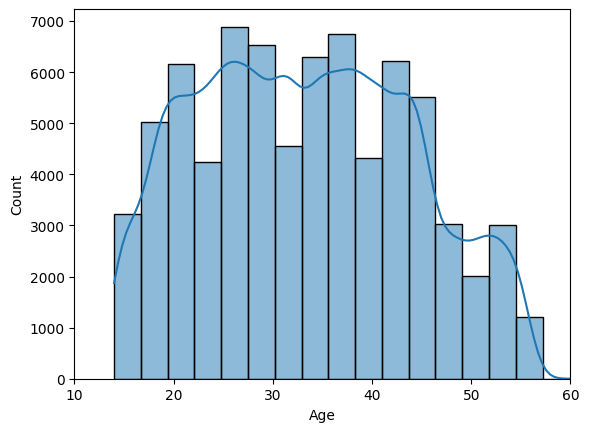

In [1202]:
sns.histplot(data= X_train, x= 'Age', bins= 30, legend= True, stat= 'count', kde= True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(10,60)
plt.show()

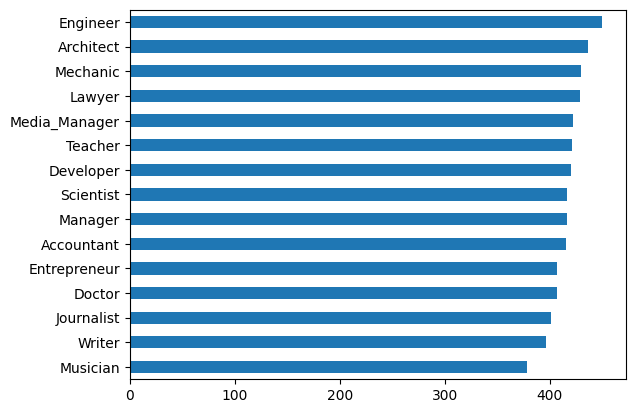

In [1203]:
_= (X_train['Occupation'].value_counts() / 12).sort_values(ascending= True).plot.barh()

In [1204]:
#verificar quais colunas sao categoricas
X_train.select_dtypes(include=['object']).columns

#Quantas dessas colunas possuem valores Unique
X_train.select_dtypes(include=['object']).nunique()

Occupation               15
Credit_Mix                3
Payment_of_Min_Amount     3
Payment_Behaviour         6
dtype: int64

In [1205]:
# Lista de colunas categóricas
categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Aplicando get_dummies em todas as colunas categóricas
df_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
df_encoded2 = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

In [1206]:
X_train = df_encoded
X_test = df_encoded2

In [1207]:
X_train

,index,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
12,13760,4105,1,25.0,52312.68,4250.3900,6.0,5.0,17,4.0,...,0,0,1,0,0,0,0,0,1,0
13,13761,4105,2,25.0,52312.68,4250.3900,6.0,5.0,17,4.0,...,0,0,1,0,1,1,0,0,0,0
14,13762,4105,3,26.0,52312.68,4250.3900,6.0,5.0,17,4.0,...,0,0,1,0,1,1,0,0,0,0
15,13763,4105,4,26.0,52312.68,4250.3900,6.0,5.0,17,4.0,...,0,0,1,0,1,0,1,0,0,0
16,13764,4105,5,26.0,52312.68,4250.3900,6.0,5.0,17,4.0,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149979,12955,4092,4,17.0,60877.17,5218.0975,6.0,8.0,27,8.0,...,0,0,0,0,1,0,0,1,0,0
149980,12956,4092,5,17.0,60877.17,5218.0975,6.0,8.0,27,8.0,...,0,0,0,0,1,0,0,0,0,0
149981,12957,4092,6,18.0,60877.17,5218.0975,6.0,8.0,27,8.0,...,0,0,0,0,1,0,0,0,0,1
149982,12958,4092,7,18.0,60877.17,5218.0975,6.0,8.0,27,8.0,...,0,0,0,0,1,1,0,0,0,0


In [1208]:
#'Credit_Score'value counts
train_cleared['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

Variável principal: Num_Credit_Inquiries


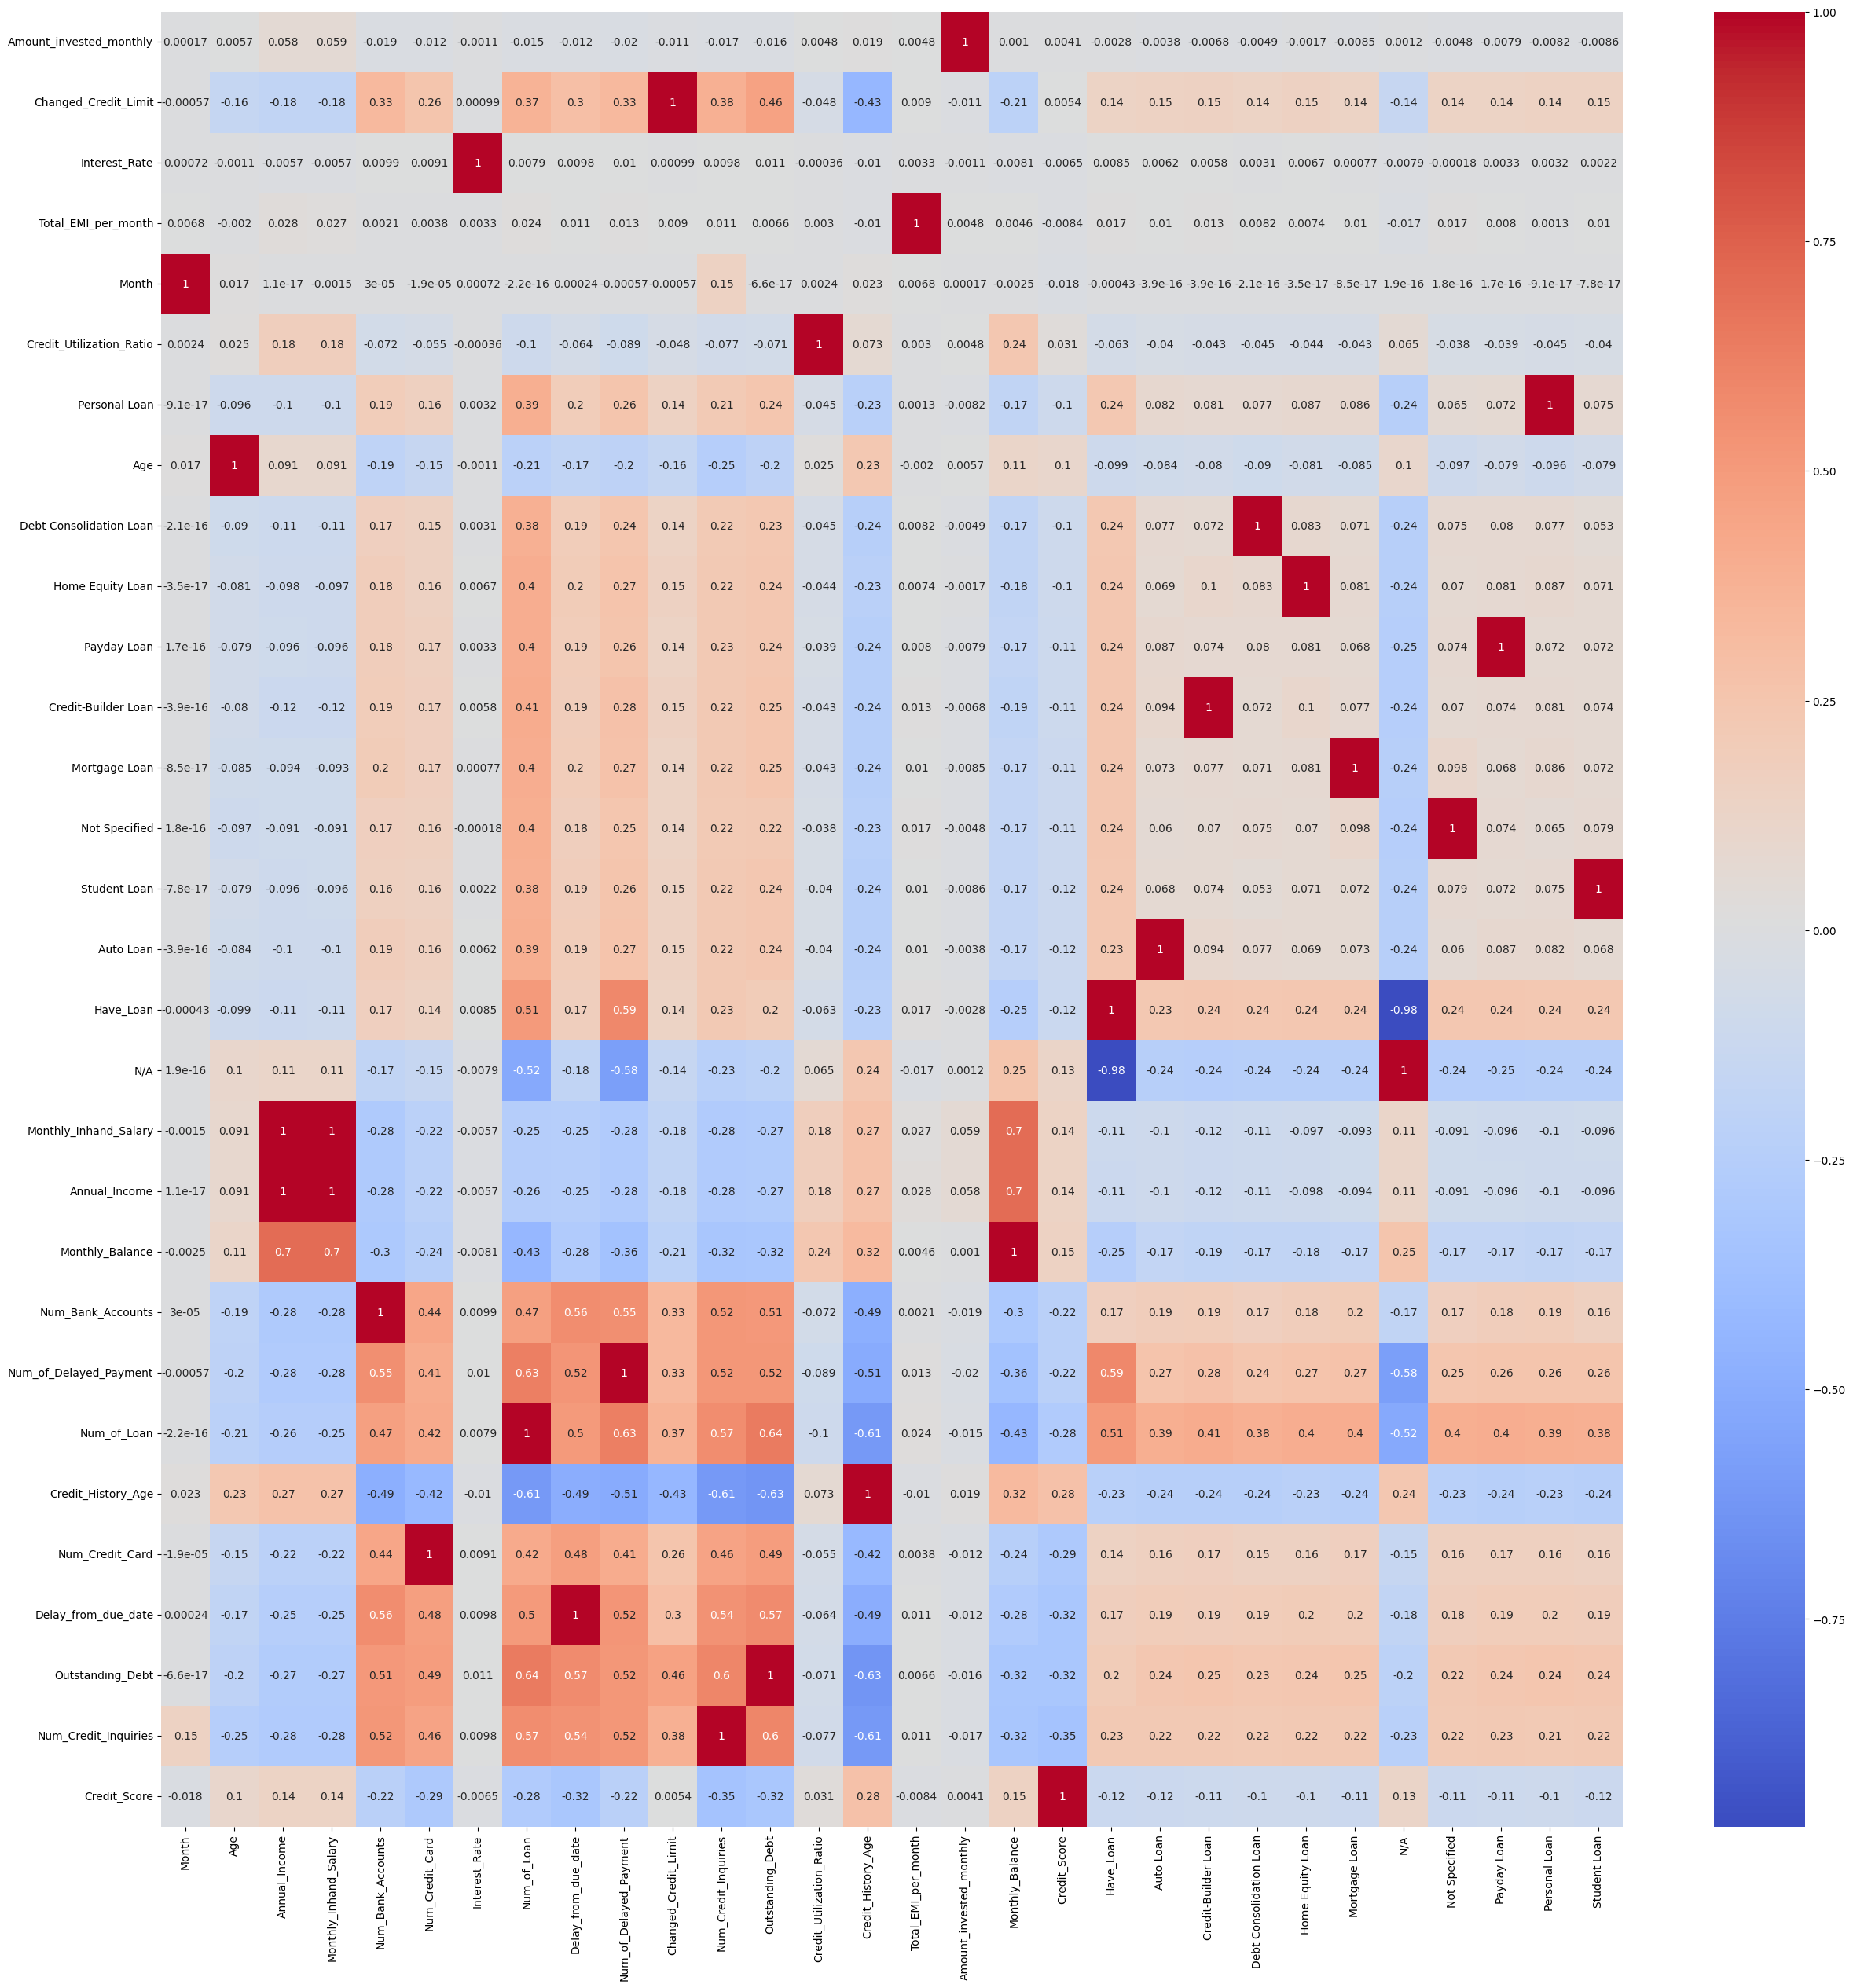

In [1209]:
df_copy = train_cleared.copy()

#apply map on Credit score, Poor=0, Standard=1, Excellent=2
df_copy['Credit_Score'] = df_copy['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Excellent': 2})
drop = ['Customer_ID', 'index']
df_copy.drop(drop, axis=1, inplace=True)

# Calcular a matriz de correlação com base no dataset
corr_matrix = df_copy.corr()

# Reordenar a matriz de correlação com base na coluna 'Credit_Score', para que ela seja a ultima verticalmente
corr_matrix = corr_matrix.reindex(corr_matrix['Credit_Score'].abs().sort_values(ascending=True).index, axis=0)

# Plotar o heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Selecionar a variável principal
main_variable = corr_matrix['Credit_Score'].abs().sort_values(ascending=False).index[1]

# Exibir a variável principal
print(f"Variável principal: {main_variable}")




<Axes: >

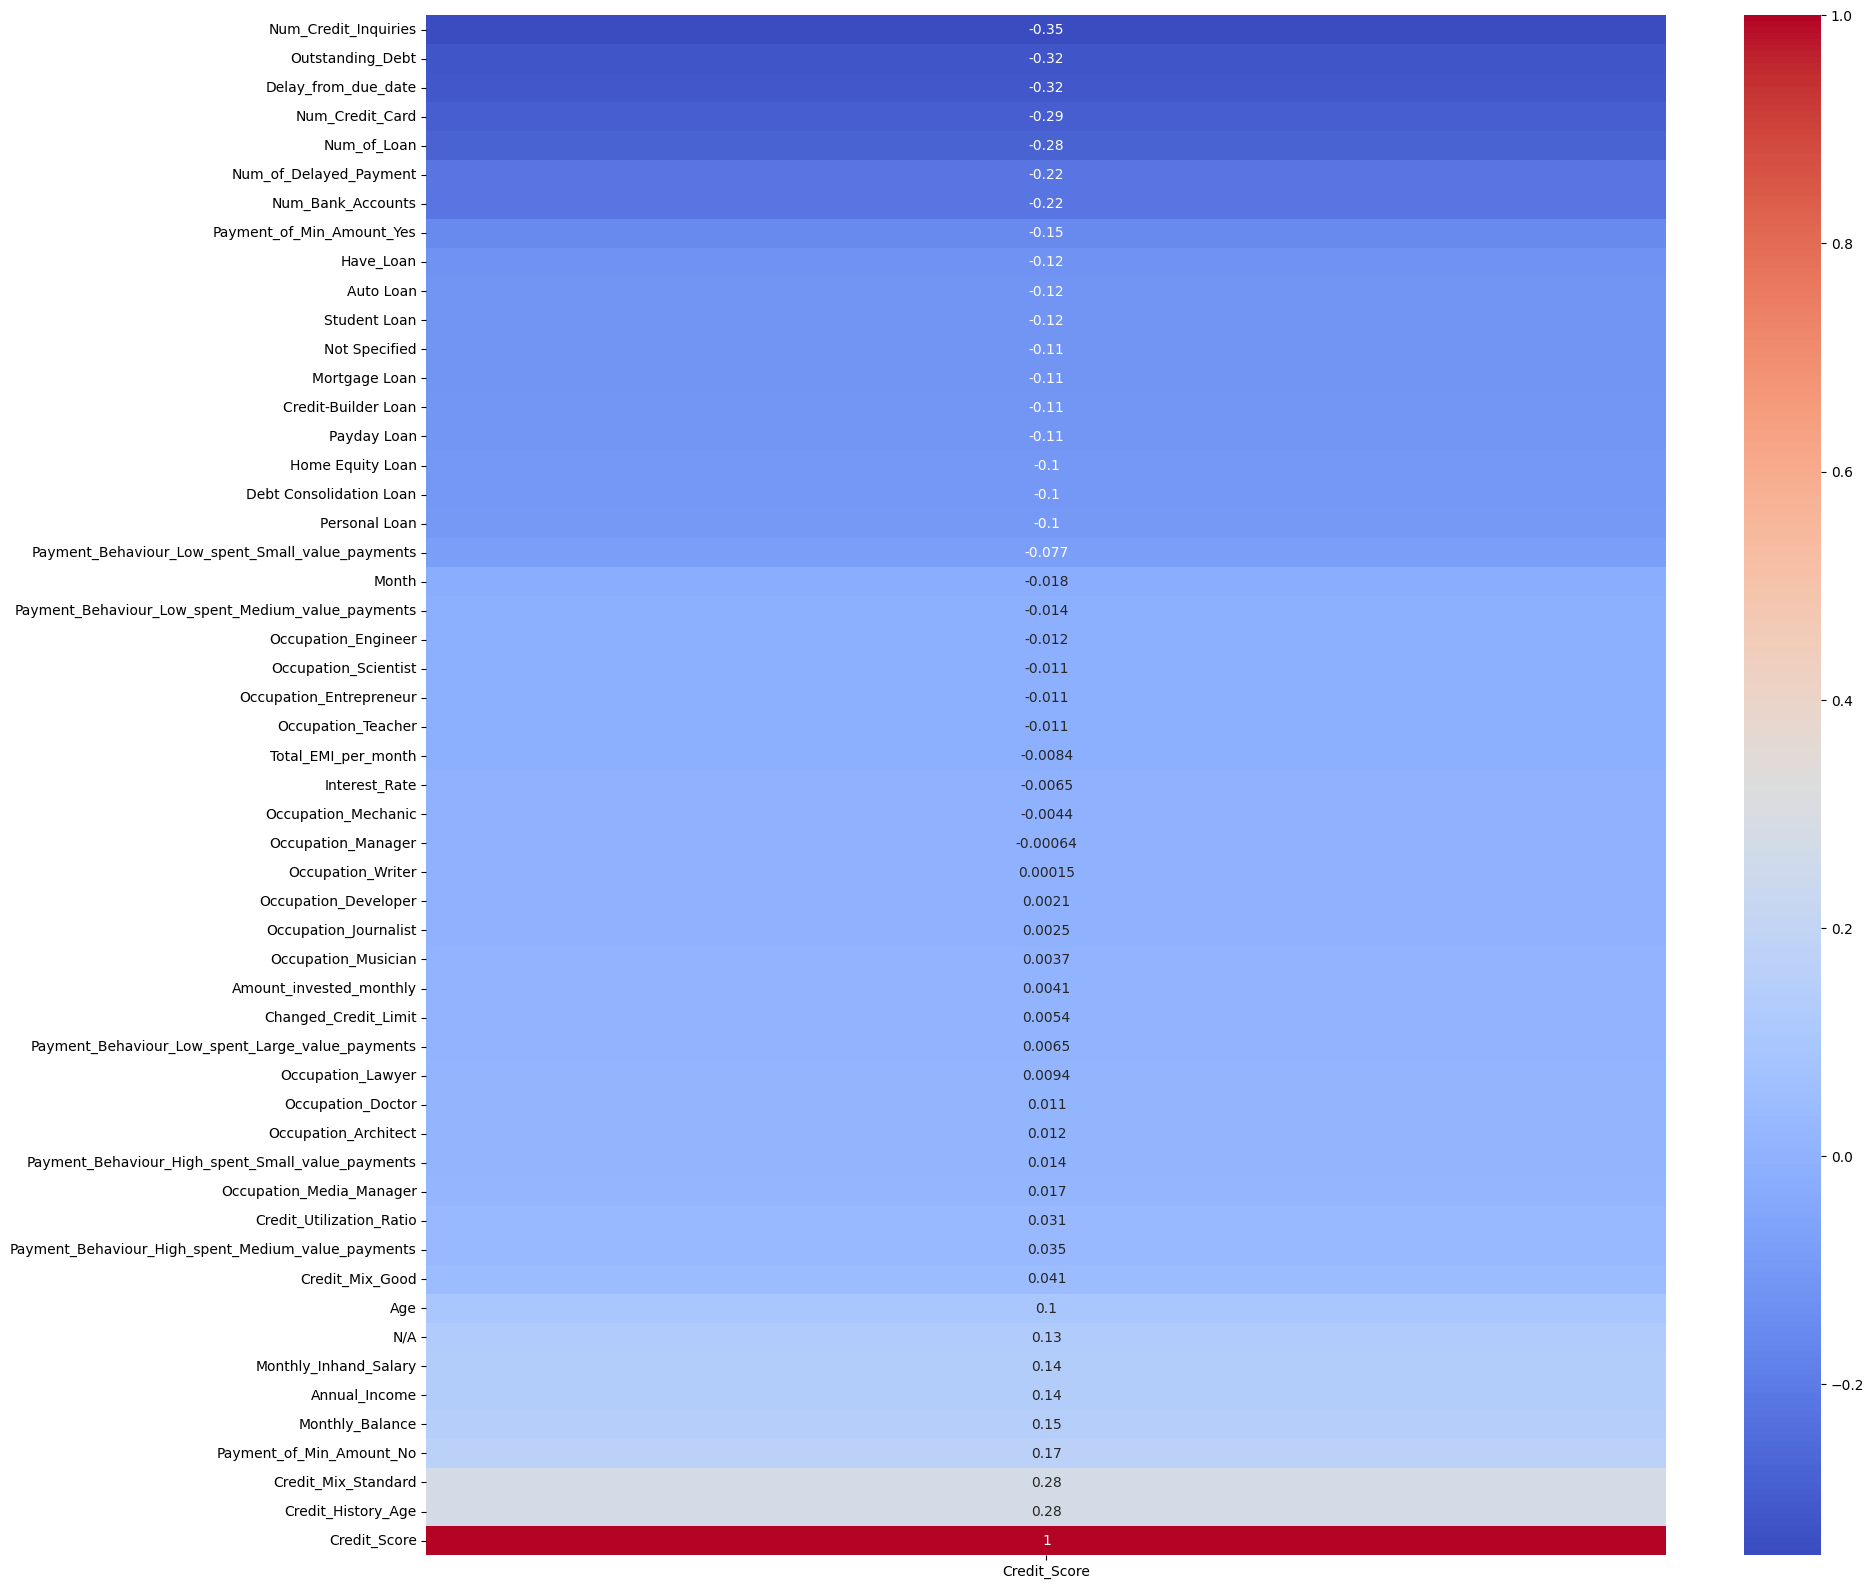

In [1210]:
df_encoded3 = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)
df_copy = df_encoded3

#Grafico de correlacao entre Credit Score e demais variaveis
plt.figure(figsize=(20, 20))
sns.heatmap(df_copy.corr()[['Credit_Score']].sort_values('Credit_Score'), annot=True, cmap='coolwarm')


In [1211]:
#verificar isnan em y_test
print(y_test.isna().sum())

#verificar isnan em y_train
print(y_train.isna().sum())

0
0


In [1212]:
#X_cols = [x for x in X_train.columns if x not in ['Credit_Score', 'Customer_ID', 'index', 'Months',
#                                                  'Interest_Rate', 'Changed_Credit_Limit', 'Total_EMI_per_month',
#                                                  'Amount_invested_monthly']]


X_cols = [x for x in X_train.columns if x not in ['Credit_Score', 'Customer_ID', 'index', 'Months','Total_EMI_per_month']]
y_cols = ['Credit_Score']

X_train = X_train[X_cols]
X_test = X_test[X_cols]


# Modelos

In [1213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.simplefilter(action='ignore', category=Warning)

from sklearn.pipeline import Pipeline
from sklearn import set_config

In [1214]:
print(X_train.shape)
print(len(y_train))

(75000, 51)
75000


In [1215]:
lista_etapas = [("std_scaler", StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))]

In [1216]:
pipe = Pipeline(lista_etapas)

In [1217]:
pipe

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [1218]:
#print xtrain shape e xtest shape
print(X_train.shape)
print(X_test.shape)

(75000, 51)
(25000, 51)


In [1219]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [1220]:
y_train = y_train.astype(str)
y_test = y_test.astype(str)

In [1221]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [1222]:
y_pred_test = pipe.predict(X_test)

In [1223]:
def print_resultados(X_train, y_train, X_test, y_test, y_pred_test, pipe):

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

    print("\n# ====================\n")


    y_pred_train = pipe.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))

[[2526  372 1742]
 [ 766 3977 2521]
 [1678 2501 8917]]


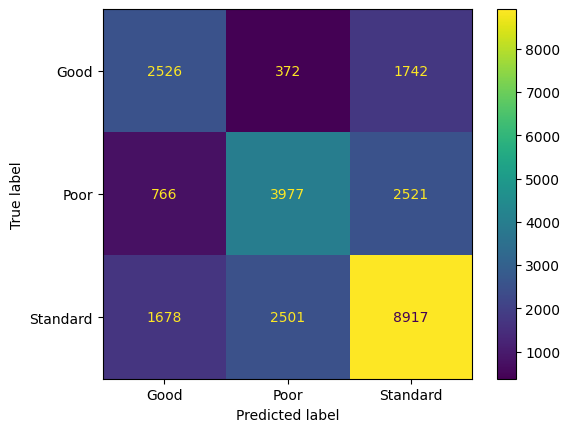

              precision    recall  f1-score   support

        Good       0.51      0.54      0.53      4640
        Poor       0.58      0.55      0.56      7264
    Standard       0.68      0.68      0.68     13096

    accuracy                           0.62     25000
   macro avg       0.59      0.59      0.59     25000
weighted avg       0.62      0.62      0.62     25000


# ====================

[[10102   213  2873]
 [  831 17671  3232]
 [ 3176  4392 32510]]


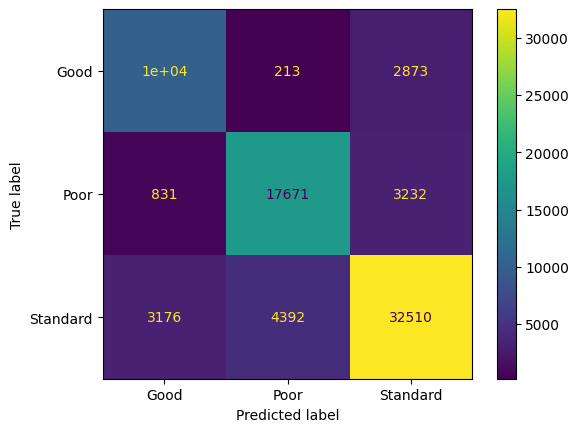

              precision    recall  f1-score   support

        Good       0.72      0.77      0.74     13188
        Poor       0.79      0.81      0.80     21734
    Standard       0.84      0.81      0.83     40078

    accuracy                           0.80     75000
   macro avg       0.78      0.80      0.79     75000
weighted avg       0.81      0.80      0.80     75000



In [1224]:
print_resultados(X_train, y_train, X_test, y_test, y_pred_test, pipe)

In [1225]:
#testar outros modelos no pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lista_etapas = [("std_scaler", StandardScaler()),
                ('log_reg', LogisticRegression())]

pipe = Pipeline(lista_etapas)

pipe.fit(X_train, y_train)

y_pred_test = pipe.predict(X_test)

[[3048  140 1452]
 [ 645 3594 3025]
 [1719 1882 9495]]


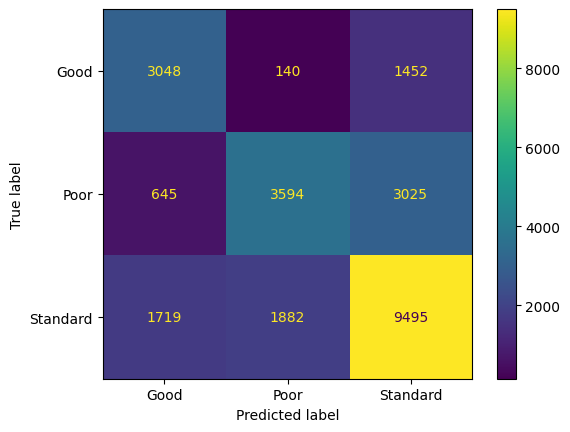

              precision    recall  f1-score   support

        Good       0.56      0.66      0.61      4640
        Poor       0.64      0.49      0.56      7264
    Standard       0.68      0.73      0.70     13096

    accuracy                           0.65     25000
   macro avg       0.63      0.63      0.62     25000
weighted avg       0.65      0.65      0.64     25000


# ====================

[[ 8706   409  4073]
 [ 1835 11233  8666]
 [ 5373  5633 29072]]


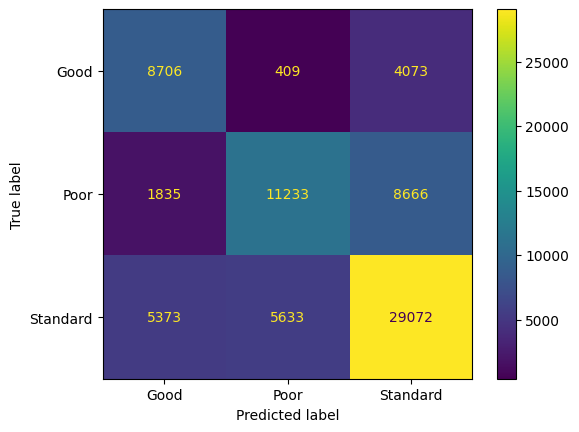

              precision    recall  f1-score   support

        Good       0.55      0.66      0.60     13188
        Poor       0.65      0.52      0.58     21734
    Standard       0.70      0.73      0.71     40078

    accuracy                           0.65     75000
   macro avg       0.63      0.63      0.63     75000
weighted avg       0.66      0.65      0.65     75000



In [1226]:
print_resultados(X_train, y_train, X_test, y_test, y_pred_test, pipe)

In [1227]:
lista_etapas = [("std_scaler", StandardScaler()),
                ('rf', RandomForestClassifier())]

pipe = Pipeline(lista_etapas)

pipe.fit(X_train, y_train)

y_pred_test = pipe.predict(X_test)

[[2983  127 1530]
 [ 576 4786 1902]
 [1602 1777 9717]]


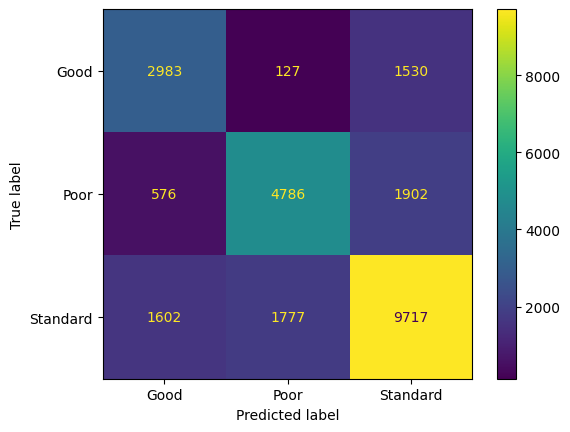

              precision    recall  f1-score   support

        Good       0.58      0.64      0.61      4640
        Poor       0.72      0.66      0.69      7264
    Standard       0.74      0.74      0.74     13096

    accuracy                           0.70     25000
   macro avg       0.68      0.68      0.68     25000
weighted avg       0.70      0.70      0.70     25000


# ====================

[[13188     0     0]
 [    0 21734     0]
 [    0     1 40077]]


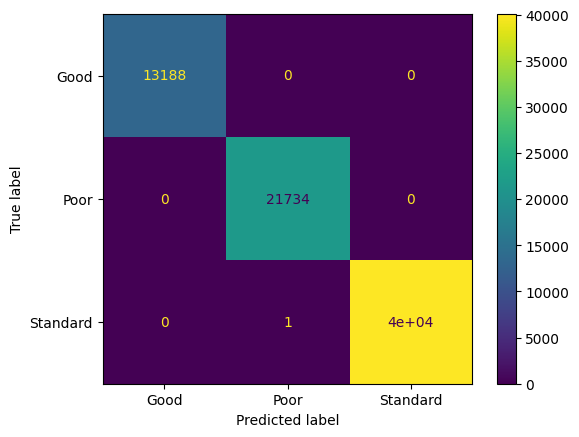

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     13188
        Poor       1.00      1.00      1.00     21734
    Standard       1.00      1.00      1.00     40078

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000



In [1228]:
print_resultados(X_train, y_train, X_test, y_test, y_pred_test, pipe)

In [1229]:
#fazer varias divisoes de teste e treino para garantir que nao demos sorte ou azar com a divisao inicial
from sklearn.model_selection import cross_val_score

lista_etapas = [("std_scaler", StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))]

pipe = Pipeline(lista_etapas)

scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')

print(scores)

print(scores.mean())

[0.6284     0.62       0.61653333 0.61666667 0.61       0.63066667
 0.61466667 0.62813333 0.62226667 0.62906667]
0.62164


In [1230]:
new_X_test = X_test.copy()
new_X_train = X_train.copy()

In [1231]:
#all columns of new_X_train to a list
new_X_train_cols = new_X_train.columns.tolist()

In [1232]:
new_X_train_cols

['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Have_Loan',
 'Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'N/A',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan',
 'Occupation_Architect',
 'Occupation_Developer',
 'Occupation_Doctor',
 'Occupation_Engineer',
 'Occupation_Entrepreneur',
 'Occupation_Journalist',
 'Occupation_Lawyer',
 'Occupation_Manager',
 'Occupation_Mechanic',
 'Occupation_Media_Manager',
 'Occupation_Musician',
 'Occupation_Scientist',
 'Occupation_Teacher',
 'Occupation_Writer',
 'Credit_Mix_Good',
 'Credit_Mix_Standard',
 'Payment_of_Min_Amount_No',
 'Payment_of_Min_Amount_Yes',

In [1233]:
drop = ['Month','Interest_Rate','Changed_Credit_Limit','Total_EMI_per_month'
        'Amount_invested_monthly','Occupation_Architect', 'Occupation_Developer','Occupation_Doctor'
        'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist','Occupation_Lawyer',
        'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist',
        'Occupation_Teacher','Occupation_Writer', 'Credit_Mix_Good',]

new_X_train_cols = [x for x in new_X_train_cols if x not in drop]
new_X_test_cols = [x for x in new_X_test.columns if x not in drop]

new_X_train = new_X_train[new_X_train_cols]
new_X_test = new_X_test[new_X_test_cols]

In [1234]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier(n_estimators=3, \
                                                   max_depth=5, \
                                                   random_state=42, \
                                                   n_jobs=-1))]

pipe_rf = Pipeline(lista_etapas).fit(X_train, y_train)

[[2983  127 1530]
 [ 576 4786 1902]
 [1602 1777 9717]]


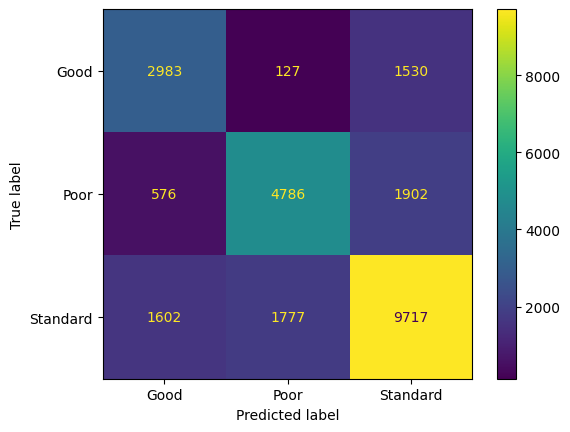

              precision    recall  f1-score   support

        Good       0.58      0.64      0.61      4640
        Poor       0.72      0.66      0.69      7264
    Standard       0.74      0.74      0.74     13096

    accuracy                           0.70     25000
   macro avg       0.68      0.68      0.68     25000
weighted avg       0.70      0.70      0.70     25000


# ====================

[[ 4185   263  8740]
 [  514 14372  6848]
 [ 2035  7876 30167]]


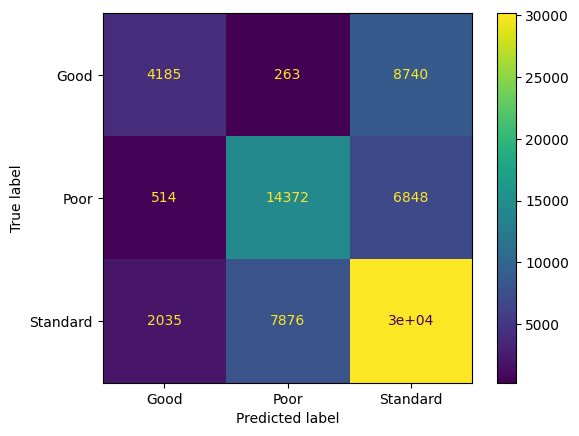

              precision    recall  f1-score   support

        Good       0.62      0.32      0.42     13188
        Poor       0.64      0.66      0.65     21734
    Standard       0.66      0.75      0.70     40078

    accuracy                           0.65     75000
   macro avg       0.64      0.58      0.59     75000
weighted avg       0.65      0.65      0.64     75000



In [1235]:
print_resultados(X_train, y_train, X_test, y_test, y_pred_test, pipe_rf)

In [1236]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier(n_estimators=100, \
                                                   max_depth=5, \
                                                   random_state=42, \
                                                   n_jobs=-1))]

pipe_rf = Pipeline(lista_etapas).fit(X_train, y_train)

[[2983  127 1530]
 [ 576 4786 1902]
 [1602 1777 9717]]


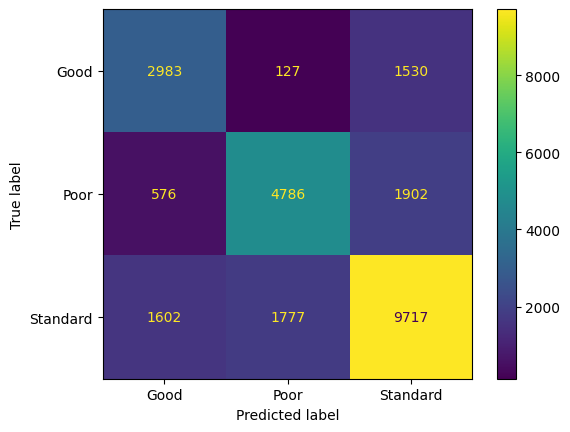

              precision    recall  f1-score   support

        Good       0.58      0.64      0.61      4640
        Poor       0.72      0.66      0.69      7264
    Standard       0.74      0.74      0.74     13096

    accuracy                           0.70     25000
   macro avg       0.68      0.68      0.68     25000
weighted avg       0.70      0.70      0.70     25000


# ====================

[[10691   257  2240]
 [ 2681 15208  3845]
 [ 7423  7899 24756]]


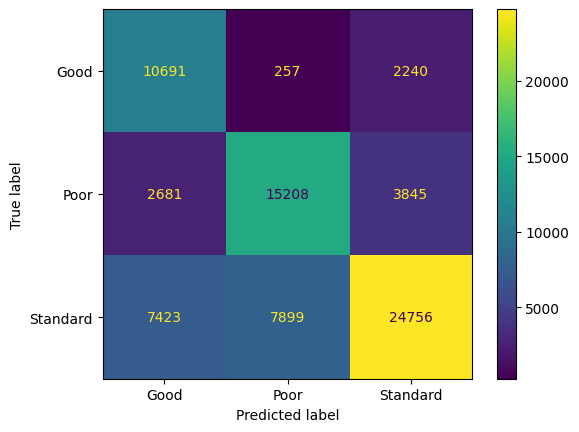

              precision    recall  f1-score   support

        Good       0.51      0.81      0.63     13188
        Poor       0.65      0.70      0.67     21734
    Standard       0.80      0.62      0.70     40078

    accuracy                           0.68     75000
   macro avg       0.66      0.71      0.67     75000
weighted avg       0.71      0.68      0.68     75000



In [1237]:
print_resultados(X_train, y_train, X_test, y_test, y_pred_test, pipe_rf)

In [1239]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import StratifiedKFold

    
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier(n_jobs=-1))]

pipe_rf = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## ====================

metrica = make_scorer(recall_score, pos_label="M")

## ====================

param_grid = {"rf__n_estimators" : range(100, 600, 100),
              "rf__max_depth" : range(3, 6),
              "rf__max_features" : ['sqrt', 'log2'],
              "rf__criterion" : ['entropy', 'gini']}

grid_rf = GridSearchCV(estimator=pipe_rf, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)


grid_rf.fit(new_X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV 1/10; 1/60] START rf__criterion=entropy, rf__max_depth=3, rf__max_features=sqrt, rf__n_estimators=100
[CV 1/10; 1/60] END rf__criterion=entropy, rf__max_depth=3, rf__max_features=sqrt, rf__n_estimators=100;, score=nan total time=   2.6s
[CV 2/10; 1/60] START rf__criterion=entropy, rf__max_depth=3, rf__max_features=sqrt, rf__n_estimators=100
[CV 2/10; 1/60] END rf__criterion=entropy, rf__max_depth=3, rf__max_features=sqrt, rf__n_estimators=100;, score=nan total time=   2.5s
[CV 3/10; 1/60] START rf__criterion=entropy, rf__max_depth=3, rf__max_features=sqrt, rf__n_estimators=100
[CV 3/10; 1/60] END rf__criterion=entropy, rf__max_depth=3, rf__max_features=sqrt, rf__n_estimators=100;, score=nan total time=   2.4s
[CV 4/10; 1/60] START rf__criterion=entropy, rf__max_depth=3, rf__max_features=sqrt, rf__n_estimators=100
[CV 4/10; 1/60] END rf__criterion=entropy, rf__max_depth=3, rf__max_features=sqrt, rf__n_estimators=100;, sc

KeyboardInterrupt: 